### LSE Data Analytics Online Career Accelerator

# Employer Project: Bank of England 

## Table of Contents
1. [Setting Up Our GitHub Repository](#1-Setting-Up-Our-GitHub-Repository)
2. [Importing and Initial Exploration of Bank of England Speeches](#2-Importing-and-Initial-Exploration-of-Bank-of-England-Speeches)
3. [Sentiment Analysis](#3-Sentiment-Analysis)
4. [Topic Analysis](#4-Topic-Analysis)
5. [Correlation with Economic Indicators](#5-Correlation-with-Economic-Indicators)

The [data set](https://www.kaggle.com/datasets/davidgauthier/central-bank-speeches/data) used in this project use speeches from senior central bankers of various influential central banks. The corpus runs from 1997 until 2022. Speeches were filtered to only UK speeches given by the Bank of England (BOE). 

### Introduction

The Bank of England (BOE) plays a crucial role in maintaining economic stability and market confidence through its strategic use of speeches. These speeches influence financial markets, enhance policy predictability, and impact economic outcomes. This report aims to explore the dynamics between BOE speeches and the broader economic context, addressing key questions:

1. __Sentiment Over Time:__ How has sentiment expressed in BOE speeches evolved over time?
2. __Correlation with Events:__ What is the correlation between speech sentiment and significant economic events?
3. __Correlation with Economic Indicators:__ How does speech sentiment relate to economic indicators?
4. __Predictive Power:__ Can speech sentiment predict market behavior?

By analysing speech sentiments, we seek insights into whether BOE's communication is reactive, proactive, predictive, or prescriptive, and how it influences economic narratives, policies, and market reactions. Understanding this relationship is essential for comprehending BOE's impact on economic outcomes.

## Data Used

The datasets utilised in this analysis are desribed below. The [all speeches dataset](https://www.kaggle.com/datasets/davidgauthier/central-bank-speeches/data) (found on Kaggle) was provided to us by the BOE, which contains speeches from senior central bankers of various influential central banks. The corpus runs from 1997 until 2022. Speeches were filtered to only UK speeches given by the Bank of England (BOE). 

1. __All Speeches- all_speeches.csv:__ Speeches from senior central bankers of various influential central banks. The corpus runs from 1997 until 2022: 
> - reference, country, date, title, author, is_gov, text.

The Economic Indicators chosen to investigate if a possible relationship/ correlation with BOE sentiment exists are detailed below. Please refer to __EP5_BOE_Data_Sourcing_Creation_of_Economic_Indicators.ipynb__ file in the repository for additional information of how we sourced, imported and created the final datast containing all the economic indicators in question. 


2. __Econ_indicators_final.xlsx:__ Economic indicators by month beginning from 1997-01, in line with the date range of the all_speeches.csv dataset. 
> - FTSE, Unemployment rate (%), CPI, RPI, Bank Rate/ Interest Rate (%), GDP (Billion USD), GDP Per Capita (USD), Annual GDP Growth (%)

## Methodology

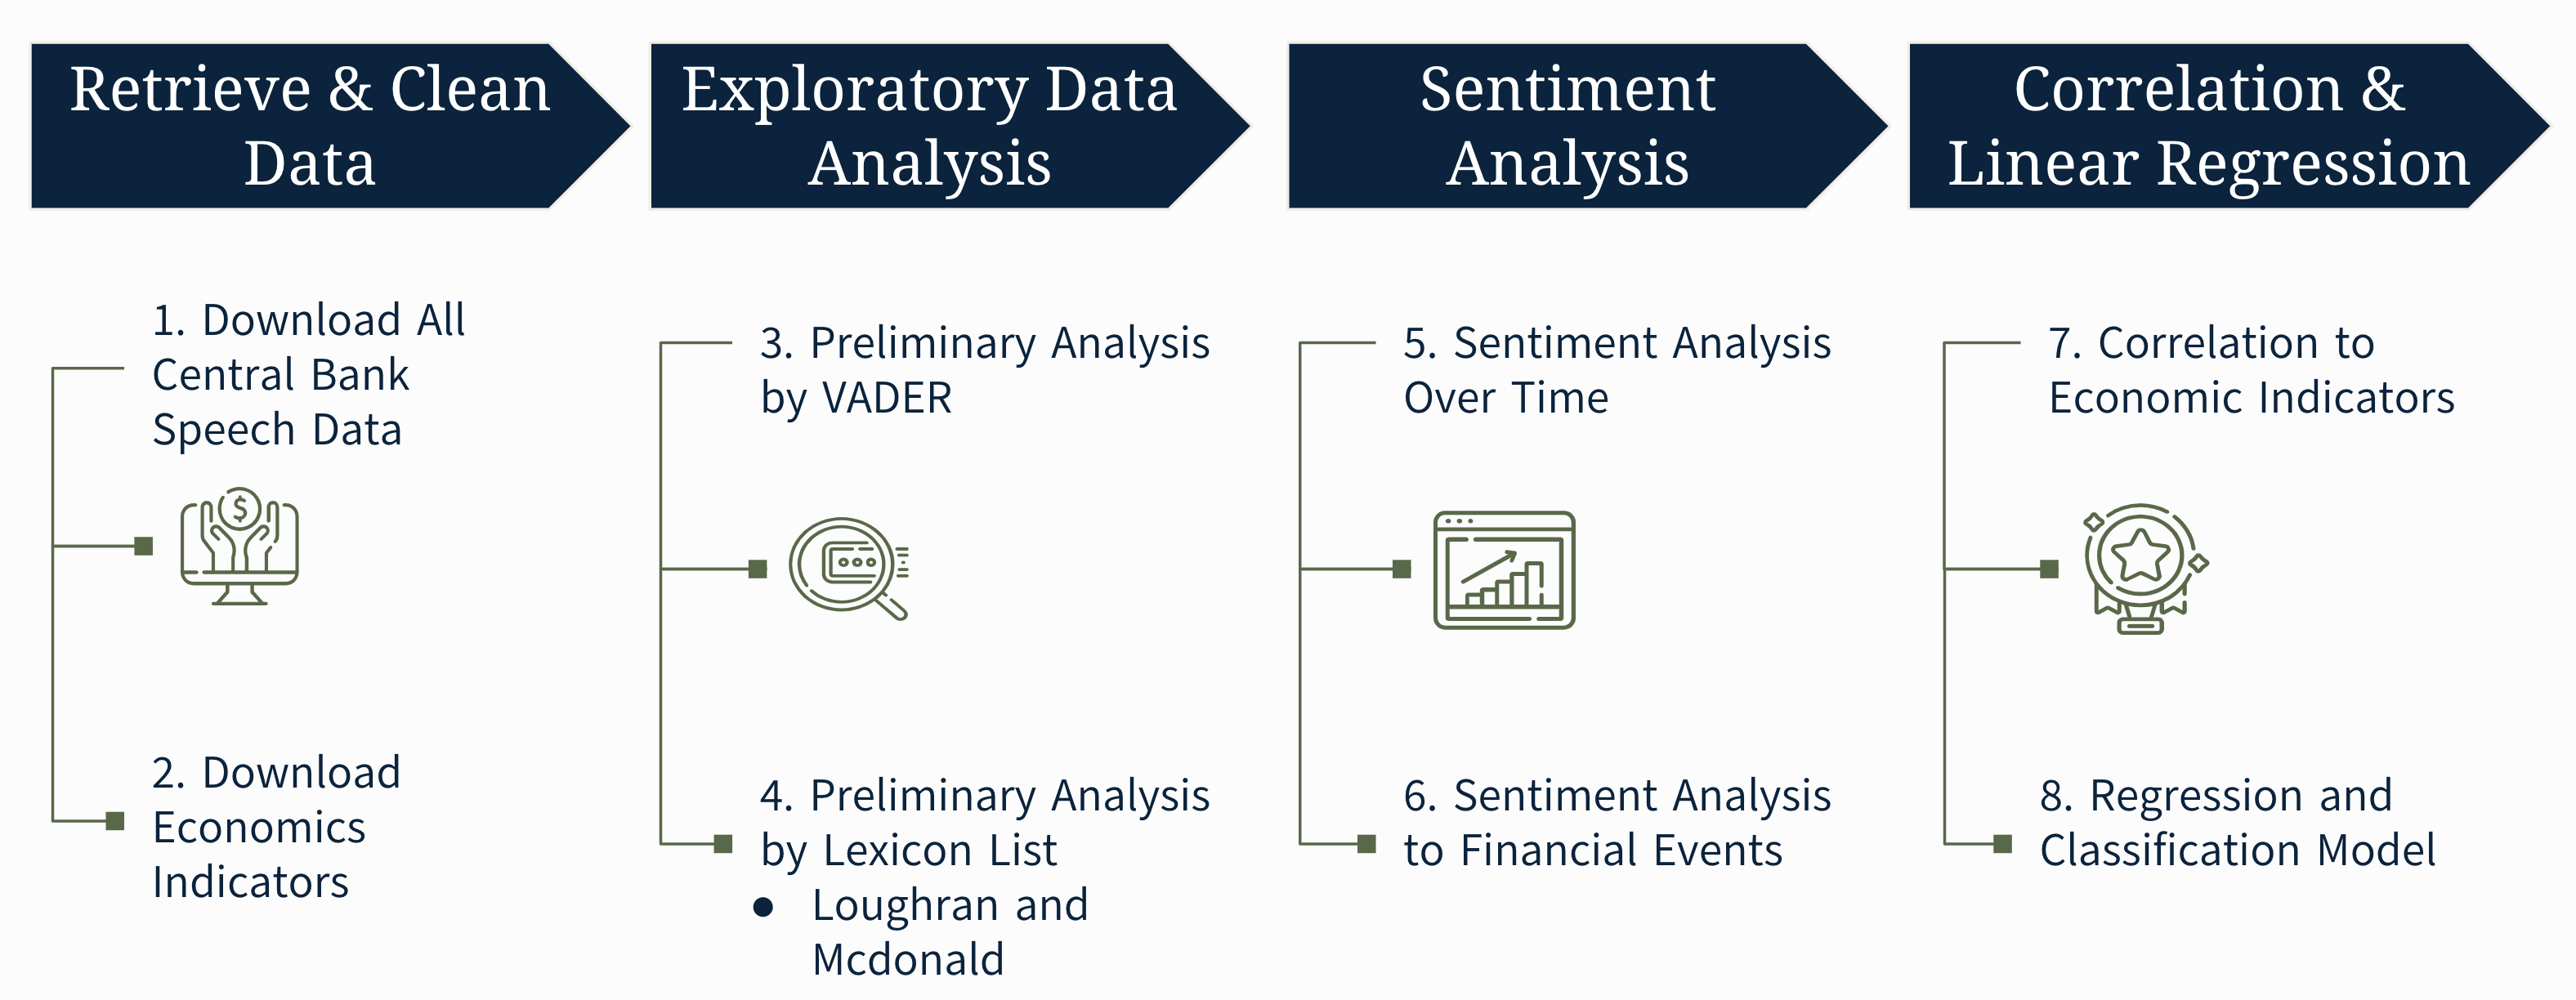

### Note: 

- This notebook reads the datasets, assuming they are in the same diretory as this notebook. 
- No errors are present in this script. If you encounter an error please check the "convert the index back to a column if neccesary" & "convert to datetime wihtout an error" sections of code. An example of the code is shown below:

Convert the index back to a column if necessary
dfi.reset_index(inplace=True)

Now 'date' is a column and you can convert it to datetime without an error
dfi['date'] = pd.to_datetime(dfi['date'])

# 1. Setting Up Our GitHub Repository

### EP Team 5 GitHub repository:

https://github.com/The-Ryan-Lin/BOE_Sentiment_Analysis

# 2. Importing and Initial Exploration of Bank of England Speeches

In [1]:
# Install the necessary libraries.
#!pip install nltk
#!pip install vaderSentiment
#!pip install textblob

In [2]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /Users/RyanLin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/RyanLin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /Users/RyanLin/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/RyanLin/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [3]:
# Load dataset. Change directory as required.
df = pd.read_csv('all_speeches.csv')

In [ ]:
df.head()

,reference,country,date,title,author,is_gov,text
0,r901128a_BOA,australia,1990-11-28,A Proper Role for Monetary Policy,fraser,0,They would no doubt argue that to have two obj...
1,r911003a_BOA,australia,1991-10-03,,fraser,0,Today I wish to talk about real interest rates...
2,r920314a_BOA,australia,1992-03-14,,fraser,0,I welcome this opportunity to talk about prosp...
3,r920529a_BOA,australia,1992-05-29,,fraser,0,It is a pleasure to have this opportunity to a...
4,r920817a_BOA,australia,1992-08-17,,fraser,0,"As a long-time fan of Don Sanders, I am deligh..."


In [ ]:
df.country.value_counts()

In [ ]:
df[df['country']=='united kingdom'].sort_values('date').head()

In [ ]:
# adding a column to calculate the string length per speech.
df['len'] = df['text'].str.len()
df

In [ ]:
# Convert to lower case and remove punctuation.
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'] = df['text'].str.replace('[^\w\s]','',regex=True)
df

In [ ]:
# Subset the data to reduce processing time.
dfi = df[df['country']=='united kingdom'].sort_values('date').reset_index(drop=True)
dfi.info()

## Speeches Frequency

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'date' column is in datetime format, if not, convert it first
dfi['date'] = pd.to_datetime(dfi['date'])

# Extract the year from the 'date' column
dfi['year'] = dfi['date'].dt.year

# Group the DataFrame by 'year' and count the number of speeches in each year
speeches_by_year = dfi.groupby('year').size()

# Create a figure and plot the data
plt.figure(figsize=(12, 6))
plt.bar(speeches_by_year.index, speeches_by_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Speeches')
plt.title('Frequency of Speeches by Year')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

In [ ]:
# Assuming 'date' column is in datetime format, if not, convert it first
dfi['date'] = pd.to_datetime(dfi['date'])

# Extract the year and quarter from the 'date' column
dfi['year'] = dfi['date'].dt.year
dfi['quarter'] = dfi['date'].dt.quarter

# Combine 'year' and 'quarter' to create a new 'year_quarter' column
dfi['year_quarter'] = dfi['year'].astype(str) + '-Q' + dfi['quarter'].astype(str)

# Group the DataFrame by 'year_quarter' and count the number of speeches in each quarter
speeches_by_quarter = dfi.groupby('year_quarter').size()

# Create a figure and plot the data
plt.figure(figsize=(12, 6))
plt.bar(speeches_by_quarter.index, speeches_by_quarter.values, color='skyblue')
plt.xlabel('Year-Quarter')
plt.ylabel('Number of Speeches')
plt.title('Frequency of Speeches by Quarter')
plt.xticks(rotation=45)

# Filter and display only the year labels on the x-axis
years = dfi['year'].unique()
plt.xticks([f'{year}-Q1' for year in years], years, rotation=45)

# Set the background color to white
plt.gca().set_facecolor('white')

plt.grid(axis='y')

plt.tight_layout()
plt.show()


In [ ]:
# Assuming 'date' column is in datetime format, if not, convert it first
dfi['date'] = pd.to_datetime(dfi['date'])

# Extract the year from the 'date' column
dfi['year'] = dfi['date'].dt.year

# Group the DataFrame by 'year' and count the number of speeches in each year
speeches_by_year = dfi.groupby('year').size()

# Calculate the average number of speeches per year
average_speeches_per_year = speeches_by_year.mean()

print(f"Average number of speeches per year: {average_speeches_per_year:.2f}")

The bar chart depicts speeches plotted quarterly from 1999 to 2022. The total of 1,209 speeches delivered, averaging 48 speeches per year. Frequency may indicate periods of heightened communication in response to economic events, which we explore below.

# 3. Sentiment Analysis

In [ ]:
%%time
# Sentiment intensity analysis using Vadar sentiment and a for loop.
sia = SentimentIntensityAnalyzer()
dft = pd.DataFrame(columns=['neg', 'neu', 'pos', 'compound'])
for j in dfi.index:
    score = sia.polarity_scores(dfi.iloc[j,6])
    new_row = pd.DataFrame({'neg': score['neg'], 'neu': score['neu'], 'pos': score['pos'], 'compound': score['compound']}, index=[j])
    dft = pd.concat([dft, new_row], ignore_index=True)
dfi = pd.concat([dfi, dft], axis=1, join="inner")
dfi

In [ ]:
%%time
# Using a self defined function with Textblob to calculate polarity and subjectivity.
def generate_polarity_subjectivity(dfs):
    dft2 = TextBlob(dfs).sentiment
    return pd.Series([dft2[0], dft2[1]])

# Apply the function to the data and add two new columns
dfi[['polarity','subjectivity']] = dfi['text'].apply(generate_polarity_subjectivity)
dfi.head()

In [ ]:
# Convert date column to datetime for time series analysis
dfi['date'] = pd.to_datetime(dfi['date'])

# Group by date quarterly and calculate average compound polarity
average_polarity_by_date = dfi.groupby(dfi['date'].dt.to_period("Q"))['compound'].mean()

# Convert PeriodIndex to DateTimeIndex for rolling
average_polarity_by_date.index = average_polarity_by_date.index.to_timestamp()

# Calculate rolling average
window_size = 2  # Adjust this window size as needed
rolling_avg_polarity = average_polarity_by_date.rolling(window=window_size).mean()

# Plotting the rolling average without markers
rolling_avg_polarity.plot(kind='line')
plt.title('Quarterly Average Sentiment Polarity (Smoothed with Rolling Average)')
plt.xlabel('Date')
plt.ylabel('Average Sentiment Polarity')
plt.show()


In [ ]:
dfi[['compound', 'polarity', 'subjectivity']].describe()

### Step 1: Load the Lexicon List

In [ ]:
import pandas as pd

# Load the lexicon file
lexicon_path = 'LSE_DA_BoE_Employer_project_Sentiment-labelled_wordlist.xlsx'  
lexicon_df = pd.read_excel(lexicon_path)

# Display the first few rows to verify it's loaded correctly
print(lexicon_df.head())

In [ ]:
# Convert lexicon DataFrame to dictionary
lexicon_dict = lexicon_df.set_index('Word').T.to_dict()

In [ ]:
NEGATION_WORDS = {
    "NOT", "NO", "NEVER", "NONE", "NOTHING", "NEITHER", "NOWHERE",
    "NOBODY", "HARDLY", "SCARCELY", "BARELY", "DOESN'T", "ISN'T",
    "WASN'T", "SHOULDN'T", "WOULDN'T", "COULDN'T", "WON'T",
    "CAN'T", "DON'T", "AIN'T", "FAIL", "WITHOUT", "LACK", "VOID",
    "EXCEPT", "ABSENT", "MISSING", "EXCLUDE", "BUT", "STOP", "REFUSE",
    "DENY", "REJECT", "DECLINE", "AVOID", "RESIST", "HINDER"
}

def calculate_lexicon_sentiment(text, lexicon):
    raw_sentiment_score = 0
    words_matched = 0

    words = text.split()
    i = 0
    while i < len(words):
        word = words[i].upper()

        # Check for negation and handle the next word
        if i + 1 < len(words) and word in NEGATION_WORDS:
            next_word = words[i + 1].upper()
            if next_word in lexicon:
                word_scores = lexicon[next_word]
                # Invert the sentiment score
                raw_sentiment_score -= (word_scores['Positive'] - word_scores['Negative'] +
                                        word_scores['Uncertainty'] + word_scores['Litigious'] +
                                        word_scores['Strong'] - word_scores['Weak'] - 
                                        word_scores['Constraining'])
                words_matched += 1
                i += 2  # Skip the next word
                continue

        if word in lexicon:
            word_scores = lexicon[word]
            raw_sentiment_score += (word_scores['Positive'] - word_scores['Negative'] +
                                    word_scores['Uncertainty'] + word_scores['Litigious'] +
                                    word_scores['Strong'] - word_scores['Weak'] - 
                                    word_scores['Constraining'])
            words_matched += 1

        i += 1

    normalized_sentiment_score = raw_sentiment_score / words_matched if words_matched > 0 else 0
    return raw_sentiment_score, normalized_sentiment_score

In [ ]:
# Apply the sentiment analysis and split the results into two columns
dfi[['raw_lexicon_sentiment', 'normalized_lexicon_sentiment']] = dfi['text'].apply(
    lambda x: calculate_lexicon_sentiment(x, lexicon_dict)
).apply(pd.Series)

In [ ]:
with pd.option_context('display.max_columns', None):  # None means all columns will be shown
    print(dfi)

In [ ]:
# Raw Sentiment
statistics_raw = dfi['raw_lexicon_sentiment'].describe()
print(statistics_raw)

In [ ]:
# Noramlised Sentiment
statistics_normalized = dfi['normalized_lexicon_sentiment'].describe()
print(statistics_normalized)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Reshape data for MinMaxScaler
raw_sentiment_values = dfi['raw_lexicon_sentiment'].values.reshape(-1, 1)

# Initialize the MinMaxScaler to scale between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))

# Scale the raw sentiment values
dfi['scaled_raw_lexicon_sentiment'] = scaler.fit_transform(raw_sentiment_values)

# Now we can compare these scaled values directly with VADER scores

In [ ]:
# dfi is the DataFrame and it contains columns 'raw_lexicon_sentiment' and 'scaled_raw_lexicon_sentiment'
print(dfi[['raw_lexicon_sentiment', 'scaled_raw_lexicon_sentiment']].head())

In [ ]:
print(dfi['scaled_raw_lexicon_sentiment'].describe())

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Reshape data for MinMaxScaler
normalized_sentiment_values = dfi['normalized_lexicon_sentiment'].values.reshape(-1, 1)

# Initialize the MinMaxScaler to scale between -1 and 1
scaler = MinMaxScaler(feature_range=(-1, 1))

# Scale the normalized sentiment values
dfi['scaled_normalized_lexicon_sentiment'] = scaler.fit_transform(normalized_sentiment_values)

# Now we can compare these scaled values directly with the VADER scores

In [ ]:
print(dfi[['normalized_lexicon_sentiment', 'scaled_normalized_lexicon_sentiment']].head())

In [ ]:
print(dfi['scaled_normalized_lexicon_sentiment'].describe())

### Summary focusing on the mean for each set:

__Raw Lexicon Sentiment:__ This measure, calculated based on a custom lexicon, had a mean value of __30.60__. This suggests a generally positive sentiment, as higher scores indicate more positive sentiment.

__Normalized Lexicon Sentiment (Preferred Appraoch):__ After normalizing the raw sentiment scores to account for the number of words matched in the lexicon, the mean sentiment score was __0.141__. This normalized score also leans toward a positive sentiment on average, with values closer to 0 indicating neutrality.

__Scaled Raw Lexicon Sentiment:__ Using the MinMaxScaler to scale the raw lexicon sentiment scores between -1 and 1, the mean scaled value was __-0.165__. This slightly negative mean score contrasts with the raw lexicon sentiment, possibly due to the scaling process emphasizing the range of sentiment.

__Scaled Normalized Lexicon Sentiment:__ Similarly, the normalized lexicon sentiment scores were scaled between -1 and 1, resulting in a mean of __-0.092__. This score is closer to zero, indicating a more neutral sentiment 
on average after scaling.

#### Normalised Lexicon Sentiment
The Normalized Lexicon Sentiment appeared to be the most suitable option for conducting sentiment analysis for several reasons:

1. Normalized Lexicon Sentiment takes into account the number of words matched in the lexicon, providing a more balanced sentiment score that is not skewed by the length of the speech. This is crucial for accurate sentiment analysis of speeches with varying word counts.

2. The mean sentiment score of 0.141 for Normalized Lexicon Sentiment is closer to neutrality (0) than the other approaches. This suggests a balanced sentiment measurement that can capture nuanced shifts in sentiment, which is particularly valuable when analysing central bank speeches that may contain both positive and negative sentiments.

3. The sentiment scores are in a more interpretable range, making it easier to gauge the sentiment direction (positive or negative) and intensity. The range from -1 to 1 allows for a clear understanding of sentiment polarity.

4. Normalisation helps in achieving a consistent sentiment score across speeches, enabling meaningful comparisons over time or between different speakers.

## Time Series Analysis - [NORMALISED]

In [ ]:
# Convert the index back to a column if necessary
dfi.reset_index(inplace=True)

# Now 'date' is a column and you can convert it to datetime without an error
dfi['date'] = pd.to_datetime(dfi['date'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert 'date' to datetime and set it as the index
dfi['date'] = pd.to_datetime(dfi['date'])
dfi.set_index('date', inplace=True)

# Resample and calculate the mean sentiment for each quarter
quarterly_sentiment = dfi.resample('Q')['normalized_lexicon_sentiment'].mean()

# Interpolate missing values
quarterly_sentiment_interpolated = quarterly_sentiment.interpolate(method='linear')

# Calculate rolling average (you may adjust the window size if needed)
window_size = 2  # This could be adjusted as per your smoothing preference
rolling_avg = quarterly_sentiment_interpolated.rolling(window=window_size).mean()

# Plot the time series with rolling average
rolling_avg.plot(kind='line')
plt.title('Quarterly Sentiment Trend (Smoothed with Rolling Average)')
plt.ylabel('Average Sentiment')
plt.show()

## Sentiment Score Distribution

In [ ]:
sns.histplot(dfi['normalized_lexicon_sentiment'], kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.show()

## Sentiment Comparison by Author

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))  # Increase the figure size
sns.barplot(x='author', y='normalized_lexicon_sentiment', data=dfi)
plt.title('Sentiment by Author')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=90)  # Rotate the labels to be vertical
plt.tight_layout()  # Adjust the plot to fit into the figure area nicely
plt.show()

## Top positive and negative authors

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average sentiment for each author
author_sentiment = dfi.groupby('author')['normalized_lexicon_sentiment'].mean().reset_index()

# Sort the authors by sentiment
sorted_authors = author_sentiment.sort_values(by='normalized_lexicon_sentiment')

# Get the top 3 most positive and top 3 most negative sentiment authors
top_positive_authors = sorted_authors[-3:]
top_negative_authors = sorted_authors[:3]

# Combine the top positive and negative authors into one DataFrame
top_authors = pd.concat([top_positive_authors, top_negative_authors]).sort_values(by='normalized_lexicon_sentiment')

# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x='author', y='normalized_lexicon_sentiment', data=top_authors, palette="coolwarm")
plt.title('Top 3 Most Positive and Negative Sentiment Authors')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=45, ha='right')  # Rotate the labels for better readability
plt.tight_layout()  # Fit the plot nicely into the figure area
plt.show()

In [ ]:
import pandas as pd

# Creating a DataFrame for the financial events
data = {
    "Year": [
        1997, 1999, 2001, 2007, 2009, 2016, 2017, 2020, 2007, 2008, 2012, 2015,
        2010, 2015, 2017, 2019, 2020, 2004, 2013, 2014, 2022, 1997, 1999, 2001, 
        2001, 2006, 2008, 2010, 2018, 2020, 2004, 2007, 2014, 2015, 2015, 2018, 
        2002, 2010, 2015, 2022
    ],
    "Event": [
        "Bank of England Independence", "Dot-com Bubble", "Financial Services Authority Regulation",
        "Global Financial Crisis", "Quantitative Easing", "Brexit Referendum", "Article 50 Triggered",
        "Brexit Transition Period", "Northern Rock Crisis", "UK Recession", "London Olympics",
        "Pension Reforms", "General Elections", "General Elections", "General Elections", 
        "General Elections", "COVID-19 Economic Response", "Financial Services Compensation Scheme",
        "Prudential Regulation Authority and Financial Conduct Authority Establishment", 
        "Bank of England Funding for Lending Scheme", "Credit Guarantee Scheme for Small Businesses",
        "Asian Financial Crisis", "Euro Introduction", "September 11 Attacks", "Enron Scandal",
        "US Housing Market Crash", "Lehman Brothers Collapse", "European Sovereign Debt Crisis",
        "US-China Trade War", "COVID-19 Pandemic", "European Expansion", "European Expansion",
        "Global Oil Price Fluctuations", "US Financial Regulations Post-2008", "Greek Debt Crisis",
        "US Interest Rate Hikes", "Sarbanes-Oxley Act Introduction", "Basel III Capital Requirements",
        "Paris Agreement on Climate Change", "War in Ukraine"
    ],
    "Impact": [
        "BoE granted independence in setting interest rates", 
        "Impacted UK tech stocks and the wider economy",
        "Major changes in financial regulation",
        "Significant impact on UK banks and the economy",
        "BoE introduced quantitative easing to stimulate the economy",
        "UK voted to leave the European Union, leading to uncertainty",
        "Start of formal Brexit negotiations",
        "End of the transition period post-Brexit",
        "First major UK bank run during the global financial crisis",
        "Triggered by the global financial crisis, significant downturn",
        "Economic implications through infrastructure development and tourism",
        "Major changes in pension regulations affecting retirement savings",
        "Political shifts with economic implications",
        "Political shifts with economic implications",
        "Political shifts with economic implications",
        "Political shifts with economic implications",
        "Fiscal policies and economic measures in response to the pandemic",
        "Launched to protect consumers if a financial firm fails",
        "New regulators of the financial services industry in the UK",
        "Encourage banks to lend to businesses",
        "Support small businesses during the COVID-19 pandemic",
        "Affected global economic stability",
        "Launch of the Euro currency; significant for UK trade relations",
        "Global economic impacts, including on the UK",
        "Affected global confidence in corporate governance",
        "Precipitated the global financial crisis",
        "A key moment in the global financial crisis",
        "Impacted Eurozone countries, with wider global effects",
        "Created global economic tensions",
        "Major global health crisis with significant economic impacts",
        "EU enlargement impacted trade and economic policies",
        "EU enlargement impacted trade and economic policies",
        "Significant changes in oil prices affected global and UK economies",
        "Changes in US financial regulation post-crisis impacted global banking",
        "Part of the Eurozone crisis, affecting European and global markets",
        "Federal Reserve’s policy changes impact global capital flows",
        "Changes in corporate governance around the world, including in the UK",
        "Led to banks having to hold more capital, impacting the UK banking sector",
        "Growing focus on sustainable finance in the UK and around the world",
        "Significant impact on the global economy, higher energy prices and inflation"
    ]
}

# Create DataFrame
financial_events_df = pd.DataFrame(data)

In [ ]:
# Saving DataFrame to Excel file
excel_path = 'Financial_Events_1997_to_2022.xlsx'
financial_events_df.to_excel(excel_path, index=False)

print(f"Financial events data saved to {excel_path}")

In [ ]:
# Since we need to add estimated dates for all events, let's define a function to estimate dates
# The function will assign an estimated date based on the event description or default to January 1st of the event year

def estimate_date(year, event):
    event_date_estimates = {
        "Bank of England Independence": "1997-05-06",
        "Dot-com Bubble": "2000-03-10",
        "Financial Services Authority Regulation": "2001-12-01",
        "Global Financial Crisis": "2008-09-15",
        "Quantitative Easing": "2009-03-05",
        "Brexit Referendum": "2016-06-23",
        "Article 50 Triggered": "2017-03-29",
        "Brexit Transition Period": "2020-12-31",
        "Northern Rock Crisis": "2007-09-14",
        "UK Recession": "2008-10-01",
        "London Olympics": "2012-07-27",
        "Pension Reforms": "2015-04-06",
        "COVID-19 Economic Response": "2020-03-11",
        "Financial Services Compensation Scheme": "2001-12-01",
        "Prudential Regulation Authority and Financial Conduct Authority Establishment": "2013-04-01",
        "Bank of England Funding for Lending Scheme": "2012-07-01",
        "Credit Guarantee Scheme for Small Businesses": "2020-03-01",
        "Asian Financial Crisis": "1997-07-01",
        "Euro Introduction": "1999-01-01",
        "September 11 Attacks": "2001-09-11",
        "Enron Scandal": "2001-10-01",
        "US Housing Market Crash": "2007-08-01",
        "Lehman Brothers Collapse": "2008-09-15",
        "European Sovereign Debt Crisis": "2010-05-01",
        "US-China Trade War": "2018-07-06",
        "COVID-19 Pandemic": "2020-03-11",
        "European Expansion": "2004-05-01",
        "Global Oil Price Fluctuations": "2014-06-01",
        "US Financial Regulations Post-2008": "2010-07-21",
        "Greek Debt Crisis": "2010-04-01",
        "US Interest Rate Hikes": "2015-12-16",
        "Sarbanes-Oxley Act Introduction": "2002-07-30",
        "Basel III Capital Requirements": "2010-12-01",
        "Paris Agreement on Climate Change": "2015-12-12",
        "War in Ukraine": "2022-02-24",
        # Additional general elections are assumed to have taken place in May of the respective years
        "General Elections": str(year) + "-05-06"
    }
    # If the event is in our estimates dictionary, return the corresponding date, otherwise return January 1st of that year
    return event_date_estimates.get(event, f"{year}-01-01")

# Apply the function to each row in the DataFrame
financial_events_df['Estimated Date'] = financial_events_df.apply(lambda row: estimate_date(row['Year'], row['Event']), axis=1)

# Convert the 'Estimated Date' to datetime format
financial_events_df['Estimated Date'] = pd.to_datetime(financial_events_df['Estimated Date'])

# Display the DataFrame to verify the changes
financial_events_df.head()

In [ ]:
# Assuming the DataFrame 'financial_events_df' has been created and the 'Estimated Date' column added,
# we'll print the entire DataFrame to check if all rows have estimated dates.

# This will print the entire DataFrame without truncation
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(financial_events_df)


In [ ]:
# calculating date range
start_date = dfi.index.min()
end_date = dfi.index.max()

print(f"The date range of the sentiment scores is from {start_date} to {end_date}")

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample economic crises that occurred within the date range of your dataset
economic_crises = {
    'Dot-com Bubble Burst': '2000-03-10',
    'Financial Crisis Start': '2007-08-09',
    'Lehman Brothers Collapse': '2008-09-15',
    'European Debt Crisis Peak': '2011-08-05',
    'COVID-19 Pandemic Start': '2020-03-11',
}

# Convert strings to datetime
economic_crises = {k: pd.to_datetime(v) for k, v in economic_crises.items()}

# Create the plot
plt.figure(figsize=(12, 6))

# Plot the sentiment over time
plt.plot(dfi.index, dfi['normalized_lexicon_sentiment'], label='Sentiment', linewidth=1)

# Annotate economic crises
for crisis, date in economic_crises.items():
    if date in dfi.index:
        plt.axvline(x=date, color='red', linestyle='--', alpha=0.5)
        plt.text(x=date, y=dfi['normalized_lexicon_sentiment'].min(), s=crisis, rotation=90, verticalalignment='bottom')

# Improve the aesthetics
plt.title('Sentiment Over Time with Key Economic Events')
plt.xlabel('Date')
plt.ylabel('Normalized Sentiment Score')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dfi' is indexed by 'date' and contains 'normalized_lexicon_sentiment'
dfi['quarter'] = dfi.index.to_period('Q')
quarterly_sentiment = dfi.groupby('quarter')['normalized_lexicon_sentiment'].mean()

# Define the periods of key economic crises
crises_periods = {
    '2008 Financial Crisis': ('2007Q3', '2009Q4'),
    'Dot-com Bubble': ('2000Q1', '2002Q4'),
    'COVID-19 Economic Impact': ('2020Q1', '2022Q4')  # Adjust the end quarter as needed
}

# Plot settings
plt.figure(figsize=(15, 7))

# Plot quarterly sentiment
quarterly_sentiment.plot(kind='line', linewidth=2, label='Average Sentiment')

# Annotate and shade periods of crises
for crisis, (start, end) in crises_periods.items():
    if start in quarterly_sentiment.index and end in quarterly_sentiment.index:
        plt.axvspan(start, end, color='red', alpha=0.3)
        plt.text(x=start, y=quarterly_sentiment.loc[start] + 0.05, s=crisis, 
                 fontsize=9, color='black', alpha=0.7)

# Set major ticks format and labels
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xticks(rotation=45, ha='right')

# Set titles and labels
plt.title('Quarterly Sentiment Analysis with Key Economic', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:

import matplotlib.dates as mdates

# Update the crisis periods
crises_periods = {
    '2008 Financial Crisis': ('2007Q3', '2009Q4'),
    'Dot-com Bubble': ('2000Q1', '2002Q4'),
    'COVID-19': ('2020Q1', '2021Q4')  # Extended to cover lockdown and 12 months after
}

# Plot settings
plt.figure(figsize=(15, 7))

# Plot the overall sentiment trend
quarterly_sentiment.plot(kind='line', linewidth=2, label='Average Sentiment')

for crisis, (start, end) in crises_periods.items():
    if start in quarterly_sentiment.index and end in quarterly_sentiment.index:
        plt.axvspan(start, end, color='red', alpha=0.3)
        crisis_midpoint = quarterly_sentiment.loc[start:end].index[len(quarterly_sentiment.loc[start:end]) // 2]
        
        # Calculate y-coordinate as a fraction of the maximum sentiment value during the crisis
        y_position = quarterly_sentiment.loc[start:end].max() * 0.2  # Adjust the 0.95 factor as needed

        plt.text(crisis_midpoint, y_position, crisis, fontsize=16, color='black', alpha=0.7, rotation=90)

# Set titles and labels
plt.title('Sentiment Analysis with Key Economic Crises', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Sentiment', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'dfi' is indexed by 'date' and contains 'normalized_lexicon_sentiment'
# Convert to monthly data
dfi['month'] = dfi.index.to_period('M')
monthly_sentiment = dfi.groupby('month')['normalized_lexicon_sentiment'].mean()

# Define key COVID-19 events
covid_events = {
    'First Cases Reported': '2019-12',
    'WHO Emergency Declaration': '2020-01',
    'First UK Lockdown': '2020-03-23',
    'Plan for Lifting Lockdown': '2020-05-10',
    'Second National Lockdown': '2020-10-31',
    'Third National Lockdown': '2021-01-06',
    'Freedom Day': '2021-07-19'
}

# Plot settings
plt.figure(figsize=(15, 7))

# Plot the overall sentiment trend for monthly data
monthly_sentiment.plot(kind='line', linewidth=2, label='Average Sentiment')

# Annotating key COVID-19 events
for event, date in covid_events.items():
    plt.axvline(x=date, color='blue', linestyle='--', alpha=0.5)  # Vertical line for each event
    plt.text(date, monthly_sentiment.max() * 0.1, event, rotation=90, fontsize=16, verticalalignment='bottom')

# Set x-axis limits and format
plt.xlim(pd.Timestamp('2019-10-01'), pd.Timestamp('2021-12-31'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate date labels for clarity
plt.xticks(rotation=45, ha='right')

# Set titles and labels
plt.title('Sentiment Analysis during the COVID-19 Crisis', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'dfi' is indexed by 'date' and contains 'normalized_lexicon_sentiment'
# Convert to monthly data
dfi['month'] = dfi.index.to_period('M')
monthly_sentiment = dfi.groupby('month')['normalized_lexicon_sentiment'].mean()

# Define key COVID-19 events
covid_events = {
    'First Cases Reported': '2019-12',
    'WHO Emergency Declaration': '2020-01',
    'First UK Lockdown': '2020-03-23',
    'Plan for Lifting Lockdown': '2020-05-10',
    'Second National Lockdown': '2020-10-31',
    'Third National Lockdown': '2021-01-06',
    'Freedom Day': '2021-07-19'
}

# Convert event dates to datetime
for event in covid_events:
    covid_events[event] = pd.to_datetime(covid_events[event])

# Plot settings
plt.figure(figsize=(15, 7))

# Plot the overall sentiment trend for monthly data
monthly_sentiment.plot(kind='line', linewidth=2, label='Average Sentiment')

# Annotating key COVID-19 events
for event, date in covid_events.items():
    plt.axvline(x=date, color='red', linestyle='--', alpha=1.0)  # Vertical line for each event
    plt.text(date, monthly_sentiment.max() * 0.1, event, rotation=90, fontsize=14, verticalalignment='bottom')

# Set x-axis limits and format
plt.xlim(pd.Timestamp('2019-10-01'), pd.Timestamp('2021-12-31'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate date labels for clarity
plt.xticks(rotation=45, ha='right')

# Set titles and labels
plt.title('Sentiment Analysis during the COVID-19 Crisis', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# ... [your existing code for defining dfi and monthly_sentiment] ...

# Define key COVID-19 events
covid_events = {
    'First Cases Reported': '2019-12',
    'WHO Emergency Declaration': '2020-01',
    'First UK Lockdown': '2020-03-23',
    'Plan for Lifting Lockdown': '2020-05-10',
    'Second National Lockdown': '2020-10-31',
    'Third National Lockdown': '2021-01-06',
    'Freedom Day': '2021-07-19'
}

# Extract sentiment scores for each event
event_sentiments = []
for event, date in covid_events.items():
    period = pd.to_datetime(date).to_period('M')
    sentiment_score = monthly_sentiment.get(period)
    event_sentiments.append({'Event': event, 'Date': date, 'Sentiment Score': sentiment_score})

# Create a DataFrame for the extracted data
event_sentiment_df = pd.DataFrame(event_sentiments)

# Display the DataFrame
print(event_sentiment_df)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'dfi' is indexed by 'date' and contains 'normalized_lexicon_sentiment'
# Convert to monthly data
dfi['month'] = dfi.index.to_period('M')
monthly_sentiment = dfi.groupby('month')['normalized_lexicon_sentiment'].mean()

# Define key COVID-19 events
covid_events = {
    'First Cases Reported': '2019-12',
    'WHO Emergency Declaration': '2020-01',
    'First UK Lockdown': '2020-03-23',
    'Plan for Lifting Lockdown': '2020-05-10',
    'Second National Lockdown': '2020-10-31',
    'Third National Lockdown': '2021-01-06',
    'Freedom Day': '2021-07-19'
}

# Plot settings
plt.figure(figsize=(15, 7))

# Plot the overall sentiment trend for monthly data
monthly_sentiment.plot(kind='line', linewidth=2, label='Average Sentiment')

# Shading and annotating key COVID-19 events
for event, date_str in covid_events.items():
    event_date = pd.to_datetime(date_str)
    shading_start = event_date - pd.Timedelta(days=14)  # 14 days before the event
    shading_end = event_date + pd.Timedelta(days=14)    # 14 days after the event

    plt.axvspan(shading_start, shading_end, color='blue', alpha=0.3)  # Shading around the event
    plt.text(event_date, monthly_sentiment.max() * 0.4, event, rotation=90, fontsize=12, ha='center', verticalalignment='bottom')

# Set x-axis limits and format
plt.xlim(pd.Timestamp('2019-10-01'), pd.Timestamp('2021-12-31'))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotate date labels for clarity
plt.xticks(rotation=45, ha='right')

# Set titles and labels
plt.title('Sentiment Analysis during the COVID-19 Crisis', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'dfi' is indexed by 'date' and contains 'normalized_lexicon_sentiment'
dfi['quarter'] = dfi.index.to_period('Q')
quarterly_sentiment = dfi.groupby('quarter')['normalized_lexicon_sentiment'].mean()

# Define the periods of key positive economic events, including 6 months before and after each event
positive_events = {
    'London Olympics': ('2012Q1', '2013Q1'),  # 6 months before and after Q3 2012
    'Brexit Referendum': ('2015Q4', '2017Q2'),  # 6 months before and after Q2 2016
    'Quantitative Easing Introduced': ('2008Q3', '2010Q1')  # 6 months before and after Q1 2009
}

# Plot settings for positive events
plt.figure(figsize=(15, 7))

# Plot quarterly sentiment for positive events
quarterly_sentiment.plot(kind='line', linewidth=2, label='Average Sentiment')

# Annotate and shade periods of positive events
for event, (start, end) in positive_events.items():
    if start in quarterly_sentiment.index and end in quarterly_sentiment.index:
        plt.axvspan(start, end, color='green', alpha=0.3)  # Ensure green shading
        plt.text(x=start, y=quarterly_sentiment.max() - 0.05, s=event, 
                 fontsize=9, color='black', alpha=0.7)

# Set major ticks format and labels for positive events
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xticks(rotation=45, ha='right')

# Set titles and labels for positive events
plt.title('Quarterly Sentiment Analysis with Key Positive Economic Events', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dfi' is indexed by 'date' and contains 'normalized_lexicon_sentiment'
dfi['quarter'] = dfi.index.to_period('Q')
quarterly_sentiment = dfi.groupby('quarter')['normalized_lexicon_sentiment'].mean()


# Revised periods for key positive economic events
positive_events = {
    'London Olympics': ('2011Q1', '2012Q3'),  # From countdown given by Gov UK through to end of Olympics 
    'Brexit': ('2015Q2', '2017Q1'),  # From annoucement of referendum through to triggering of Article 50
}

# Plot settings
plt.figure(figsize=(15, 7))

# Plot quarterly sentiment
quarterly_sentiment.plot(kind='line', linewidth=2, label='Average Sentiment')

# Determine a suitable y-position for the text
y_text_position = quarterly_sentiment.max() * 0.2  # For example, 90% of the max value

# Annotate and shade periods of positive events
for event, (start, end) in positive_events.items():
    if start in quarterly_sentiment.index and end in quarterly_sentiment.index:
        plt.axvspan(start, end, color='green', alpha=0.3)  # Green shading
        start_timestamp = pd.Period(start).start_time
        end_timestamp = pd.Period(end).end_time
        midpoint_timestamp = start_timestamp + (end_timestamp - start_timestamp) / 2
        mid_point = midpoint_timestamp.to_period('Q')
        plt.text(x=mid_point, y=y_text_position, s=event, 
                 fontsize=16, color='black', alpha=0.7, rotation=90, va='center', ha='center')

# Set major ticks format and labels
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))
plt.xticks(rotation=45, ha='right')

# Set x-axis to start from 2008 (adjust if your data starts later)
x_axis_start = max(quarterly_sentiment.index.min(), pd.Period('2008Q1'))
plt.xlim(left=x_axis_start)

# Set titles and labels
plt.title('Sentiment Analysis with Potential Economic Opportunities', fontsize=16)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Sentiment', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'dfi' is indexed by 'date' and contains 'normalized_lexicon_sentiment'
# Convert to monthly data
dfi['month'] = dfi.index.to_period('M')
monthly_sentiment = dfi.groupby('month')['normalized_lexicon_sentiment'].mean()

# Define key Brexit events
brexit_events = {
    'Cameron Announces Referendum': '2013-01-23',
    'Brexit Referendum': '2016-06-23',
    'Article 50 Triggered': '2017-03-29',
    'May’s Deal Rejected': '2019-01-15',
    'Boris Johnson Tenure Starts': '2019-07-23',  # Corrected this line
    'UK Formally Leaves EU': '2020-01-31',
    'End of Transition Period': '2020-12-31'
}

# Plot settings
plt.figure(figsize=(15, 7))

# Plot the overall sentiment trend for monthly data
monthly_sentiment.plot(kind='line', linewidth=2, label='Average Sentiment')

# Annotating key Brexit events
for event, date in brexit_events.items():
    plt.axvline(x=date, color='green', linestyle='--', alpha=0.5)  # Vertical line for each event
    plt.text(date, monthly_sentiment.max() * 0.5, event, rotation=90, fontsize=12, verticalalignment='bottom')

# Set x-axis limits and format
plt.xlim(pd.Timestamp('2012-09-01'), pd.Timestamp('2021-06-30'))

# Rotate date labels for clarity
plt.xticks(rotation=45, ha='right')

# Set titles and labels
plt.title('Sentiment Analysis during Key Brexit Events', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming 'dfi' is indexed by 'date' and contains 'normalized_lexicon_sentiment'
# Convert to monthly data
dfi['month'] = dfi.index.to_period('M')
monthly_sentiment = dfi.groupby('month')['normalized_lexicon_sentiment'].mean()

# Define key COVID-19 events
covid_events = {
    'First Cases Reported': '2019-12',
    'WHO Emergency Declaration': '2020-01',
    'First UK Lockdown': '2020-03-23',
    'Plan for Lifting Lockdown': '2020-05-10',
    'Second National Lockdown': '2020-10-31',
    'Third National Lockdown': '2021-01-06',
    'Freedom Day': '2021-07-19'
}

# Plot settings
plt.figure(figsize=(15, 7))

# Plot the overall sentiment trend for monthly data
monthly_sentiment.plot(kind='line', linewidth=2, label='Average Sentiment')

# Annotating key COVID-19 events
for event, date in covid_events.items():
    event_date = pd.to_datetime(date)
    plt.axvline(x=event_date, color='blue', linestyle='--', alpha=0.5)
    plt.text(event_date, monthly_sentiment.max() * 0.1, event, rotation=90, fontsize=12, verticalalignment='bottom')

# Set x-axis limits and format
plt.xlim(pd.Timestamp('2019-10-01'), pd.Timestamp('2021-12-31'))

# Force x-axis labels to be in the '%Y-%m' format
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

# Rotate date labels for clarity
plt.xticks(rotation=45, ha='right')

# Set titles and labels
plt.title('Sentiment Analysis during the COVID-19 Crisis', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Sentiment', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Assuming 'dfi' is your original DataFrame indexed by 'date'
# and contains 'normalized_lexicon_sentiment'

# Convert index to datetime for easier manipulation
dfi.index = pd.to_datetime(dfi.index)

# Convert to monthly data
dfi['month_year'] = dfi.index.to_period('M')
monthly_sentiment = dfi.groupby('month_year')['normalized_lexicon_sentiment'].mean()

# Define key Brexit events
brexit_events = {
    'Cameron Announces Referendum': '2013-01',
    'Brexit Referendum': '2016-06',
    'Article 50 Triggered': '2017-03',
    'May’s Deal Rejected': '2019-01',
    'Boris Johnson Leads': '2019-07',
    'UK Formally Leaves EU': '2020-01',
    'End of Transition Period': '2020-12'
}

# Create a list to store event data
events_data = []

# Loop through each event, find the average sentiment score for that month
for event, month in brexit_events.items():
    avg_sentiment = monthly_sentiment.get(month, 'No data')
    events_data.append({'Event': event, 'Month': month, 'Average Sentiment': avg_sentiment})

# Convert the list to a DataFrame
events_df = pd.DataFrame(events_data)

# Output the DataFrame
print(events_df)


In [ ]:
# Check the column names in dfi DataFrame
print(dfi.columns)

In [ ]:
# Convert the index back to a column if necessary
dfi.reset_index(inplace=True)

# Now 'date' is a column and you can convert it to datetime without an error
dfi['date'] = pd.to_datetime(dfi['date'])

In [ ]:
# Assuming dfi is the sentiment analysis DataFrame with 'date' and 'scaled_lexicon_sentiment' columns,
# and financial_events_df is the DataFrame with 'Estimated Date' and 'Event' columns.

# First, create a DataFrame to store events and their corresponding sentiment scores
event_sentiments = []

# Loop through each event in the financial events DataFrame
for index, event_row in financial_events_df.iterrows():
    event_date = event_row['Estimated Date']
    event_name = event_row['Event']
    
    # Find sentiment scores for speeches within a window around the event date
    # Here we define a window of 7 days before and after the event
    window_start = event_date - pd.Timedelta(days=7)
    window_end = event_date + pd.Timedelta(days=7)
    
    # Filter dfi for speeches within the window and calculate the average sentiment
    window_sentiments = dfi[(dfi['date'] >= window_start) & (dfi['date'] <= window_end)]
    average_sentiment = window_sentiments['normalized_lexicon_sentiment'].mean()
    
    # Add the event name, date, and average sentiment to the list
    event_sentiments.append({
        'Event': event_name,
        'Date': event_date,
        'Average Sentiment': average_sentiment
    })

# Convert the list of event sentiments to a DataFrame
event_sentiments_df = pd.DataFrame(event_sentiments)

# Sort the events by date
event_sentiments_df = event_sentiments_df.sort_values(by='Date')

# Print the event sentiments DataFrame
print(event_sentiments_df)

# 4. Topic Analysis

In [ ]:
pip install nltk gensim

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

In [ ]:
import pandas as pd
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Make sure to have your data loaded into the 'dfi' DataFrame and the 'date' column is in datetime format.

# Preprocess the text function
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return words

# Apply preprocessing to the text column
dfi['processed_text'] = dfi['text'].apply(preprocess_text)

# Group the speeches by year
grouped = dfi.groupby(dfi['date'].dt.year)

# Dictionary to hold corpora for each year
yearly_corpora = {}

for year, group in grouped:
    # Create a dictionary and corpus for each year
    dictionary = corpora.Dictionary(group['processed_text'])
    corpus = [dictionary.doc2bow(text) for text in group['processed_text']]
    
    # Save the dictionary and corpus in a dictionary keyed by year
    yearly_corpora[year] = (dictionary, corpus)
    
    # Build LDA model for each year
    lda_model = models.LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)
    
    # Print topics for each year
    print(f"Year: {year}")
    for idx, topic in lda_model.print_topics(-1):
        print('Topic: {} \nWords: {}'.format(idx, topic))
    print("\n" + "="*50 + "\n")

In [ ]:
topics = {
    "Inflation and Monetary Policy": ["inflation", "monetary", "interest rate", "central bank"],
    "Financial Markets and Banking Sector": ["financial market", "banks", "liquidity", "credit", "risk"],
    "Economic Growth and Productivity": ["economic growth", "productivity", "GDP"],
    "Global Financial Crisis and Market Stability": ["financial crisis", "market stability", "2008 crisis"],
    "Regulatory Changes and Technological Advancements": ["regulatory changes", "fintech", "digital banking", "technological advancements"]
}

In [ ]:
def extract_text_for_topics(dfi, topics):
    topic_texts = {topic: [] for topic in topics}
    for index, row in dfi.iterrows():
        for topic, keywords in topics.items():
            if any(keyword in row['text'] for keyword in keywords):
                topic_texts[topic].append(row)
    return topic_texts

topic_dataframes = extract_text_for_topics(dfi, topics)

In [ ]:
def yearly_sentiment_average(topic_df):
    topic_df['year'] = pd.to_datetime(topic_df['date']).dt.year
    return topic_df.groupby('year')['normalized_lexicon_sentiment'].mean()

topic_sentiment_over_time = {topic: yearly_sentiment_average(pd.DataFrame(data))
                             for topic, data in topic_dataframes.items()}

In [ ]:
import matplotlib.pyplot as plt

for topic, sentiments in topic_sentiment_over_time.items():
    plt.figure(figsize=(10, 5))
    sentiments.plot(title=f'Sentiment Trend for {topic}')
    plt.ylabel('Average Sentiment Score')
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming topic_sentiment_over_time is a dictionary with topics as keys and Pandas Series as values
for topic, sentiments in topic_sentiment_over_time.items():
    plt.figure(figsize=(10, 5))
    
    # Plot the sentiments
    sentiments.plot(title=f'Sentiment Trend for {topic}')
    
    # Set y-axis limits based on the min and max of the sentiments
    y_min = sentiments.min() - 0.1  # Extra buffer
    y_max = sentiments.max() + 0.1  # Extra buffer
    plt.ylim(y_min, y_max)
    
    plt.ylabel('Average Sentiment Score')
    plt.xlabel('Year')
    plt.grid(True)  # Optional: Adds a grid for better readability
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Assuming topic_sentiment_over_time is a dictionary with topics as keys and Pandas Series as values
for topic, sentiments in topic_sentiment_over_time.items():
    plt.figure(figsize=(12, 6))
    
    # Plotting the sentiments
    sentiments.plot(title=f'Sentiment Trend for {topic}', color='dodgerblue', marker='o')

    # Setting y-axis limits based on the min and max of the sentiments
    y_min, y_max = sentiments.min() - 0.1, sentiments.max() + 0.1
    plt.ylim(y_min, y_max)

    plt.ylabel('Average Sentiment Score')
    plt.xlabel('Year')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    
    # Highlighting zero line
    plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')

    # Annotations (customize as needed)
    for year, sentiment in sentiments.items():
        if sentiment == y_min or sentiment == y_max:
            plt.annotate(f'{sentiment:.2f}', (year, sentiment), textcoords="offset points", xytext=(0,10), ha='center')

    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

window_size = 3  # Adjust the window size for the moving average

for topic, sentiments in topic_sentiment_over_time.items():
    plt.figure(figsize=(12, 6))
    sentiments.plot(title=f'Sentiment Trend for {topic}', marker='o')
    
    # Calculate and plot moving average
    moving_avg = sentiments.rolling(window=window_size, center=True).mean()
    moving_avg.plot(style='--', label=f'{window_size}-Year Moving Average')
    
    plt.legend()
    plt.ylabel('Average Sentiment Score')
    plt.xlabel('Year')
    plt.grid(True)
    plt.show()

In [ ]:
import matplotlib.pyplot as plt

for topic, sentiments in topic_sentiment_over_time.items():
    plt.figure(figsize=(12, 6))
    sentiments.plot(kind='bar', color=sentiments.apply(lambda x: 'red' if x < 0 else 'blue'))
    
    plt.title(f'Yearly Sentiment Changes for {topic}')
    plt.ylabel('Average Sentiment Score')
    plt.xlabel('Year')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Again, assuming 'topic_sentiment_over_time' is your dictionary
for topic, sentiments in topic_sentiment_over_time.items():
    plt.figure(figsize=(12, 6))

    # Resetting index to get 'year' as a column
    df = sentiments.reset_index()

    # Creating the scatter plot with regression line
    sns.regplot(x='year', y=df.columns[1], data=df)

    plt.title(f'Trend of Sentiment Over Time for {topic}')
    plt.ylabel('Sentiment Score')
    plt.xlabel('Year')
    plt.grid()
    plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd

# Assuming topic_sentiment_over_time is a dictionary with each key being a topic and value being a Series of yearly average sentiments

# Convert each topic's sentiment trend into a DataFrame and store them in a list
topic_dfs = []
for topic, sentiments in topic_sentiment_over_time.items():
    df = sentiments.reset_index()  # Resetting index to convert year from index to a column
    df.columns = ['Year', topic]  # Rename columns
    topic_dfs.append(df)

# Initialize an empty DataFrame for consolidated results
consolidated_df = None

# Merge all dataframes on 'Year'
for df in topic_dfs:
    if consolidated_df is None:
        consolidated_df = df
    else:
        consolidated_df = pd.merge(consolidated_df, df, on='Year', how='outer')

# Print the consolidated DataFrame
print(consolidated_df)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'Year' is already set as the index
if 'Year' not in consolidated_df.columns:
    # 'Year' is already the index, no need to set it again
    heatmap_df = consolidated_df
else:
    # Set 'Year' as the index
    heatmap_df = consolidated_df.set_index('Year')

plt.figure(figsize=(15, 10))

# Create a heatmap using a blue color scale
sns.heatmap(heatmap_df, annot=True, cmap='Blues', linewidths=.5, fmt=".2f")

# Adding titles and labels for clarity
plt.title('Yearly Sentiment Scores by Topic', fontsize=20)
plt.ylabel('Year', fontsize=15)
plt.xlabel('Topics', fontsize=15)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if 'Year' is already set as the index
if 'Year' not in consolidated_df.columns:
    # 'Year' is already the index, no need to set it again
    heatmap_df = consolidated_df
else:
    # Set 'Year' as the index
    heatmap_df = consolidated_df.set_index('Year')

plt.figure(figsize=(15, 10))

# Create a heatmap using a blue color scale without annotating the values
sns.heatmap(heatmap_df, cmap='Blues', linewidths=.5)

# Adding titles and labels for clarity
plt.title('Yearly Sentiment Scores by Topic', fontsize=20)
plt.ylabel('Year', fontsize=15)
plt.xlabel('Topics', fontsize=15)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Check if 'Year' is already set as the index
if 'Year' not in consolidated_df.columns:
    # 'Year' is already the index, no need to set it again
    heatmap_df = consolidated_df
else:
    # Set 'Year' as the index
    heatmap_df = consolidated_df.set_index('Year')

plt.figure(figsize=(15, 10))

# Create a heatmap using a blue color scale without annotating the values
ax = sns.heatmap(heatmap_df, cmap='Blues', linewidths=.5)

# Setting titles and labels with larger font size
plt.title('Yearly Sentiment Scores by Topic', fontsize=20)
plt.ylabel('Year', fontsize=15)
plt.xlabel('Topics', fontsize=15)

# Increase font size for x and y axis ticks
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

# Wrap the x-axis labels onto the next line if too long
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', wrap=True)

plt.show()

# 5. Correlation with Economic Indicators

In [ ]:
# Read Economic Indicator data.
df_indi = pd.read_excel('Econ_indicators_final.xlsx')

# Now you can view the data frame to confirm it's loaded correctly
display(df_indi.head())

In [ ]:
# Rename the columns
df_indi.rename(columns={
    'Date': 'date',
    'FTSE': 'ftse',
    'Unemployment rate (aged 16 and over)': 'unemployment_rate',
    'CPI': 'cpi',
    'RPI': 'rpi',
    'GDP': 'gdp',
    'BoE Interest Rate': 'bank_rate',
    'GDP ( Billions of US $)': 'gdp_busd',
    'Per Capita (US $)': 'gdp_pc',
    'gbp_busd': 'gdp_busd',
    'Annual % Change': 'gdp_growth',
    'unemplyment_rate': 'unemployment_rate',
    
}, inplace=True)

display(df_indi)

In [ ]:
# Create a new DataFrame with the desired columns
new_dfi = dfi[['date', 'country', 'title', 'author', 'text', 'len', 'raw_lexicon_sentiment', 'normalized_lexicon_sentiment']].copy()

display(new_dfi)

### Merging the Economic Indicators with the All Speeches Dataset

Here we are merge the economic indicators from the DataFrame into the 'di_indi' DataFrame by date (inner join)

In [ ]:
# Convert the 'date' column to the desired format '%Y-%m'
new_dfi['date'] = pd.to_datetime(new_dfi['date']).dt.strftime('%Y-%m')

display(new_dfi)

In [ ]:
# Merge the two dataframes by the 'date' column
merged_df = pd.merge(new_dfi, df_indi, on='date', how='inner')

display(merged_df)

In [ ]:
# Check for missing values in selected columns
missing_values = merged_df[['ftse', 'unemployment_rate', 'cpi', 'rpi', 'gdp', 'bank_rate', 'gdp_busd', 'gdp_pc', 'gdp_growth']].isnull().sum()
print("Missing Values in Selected Columns:")
print(missing_values)

In [ ]:
# Check for missing values in the entire DataFrame
missing_values = merged_df.isna().sum()

# Display columns with missing values and their respective counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

In [ ]:
print(merged_df.dtypes)

In [ ]:
# Changing colun datatypes
data_types = {
    'unemployment_rate': float,
    'gdp_busd': float,
    'gdp_pc': float,
    'gdp_growth': float,
}

# Apply the data types to the DataFrame
merged_df = merged_df.astype(data_types)

In [ ]:
print(merged_df.dtypes)

# Correlation Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr 
import matplotlib.dates as mdates
import scipy.stats as stats
import statsmodels.api as sm
from scipy import stats

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the economic indicators
data = merged_df[['ftse', 'unemployment_rate', 'cpi', 'rpi', 'bank_rate', 'gdp_busd', 'gdp_growth']]

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a more visually appealing heatmap
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)  # Increase font size for axis labels
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='Blues',  # Use a single shade of blue
    fmt=".2f",
    linewidths=1,
    linecolor='gray',  # Add gray lines between cells
    cbar_kws={'label': 'Correlation Coefficient', 'orientation': 'vertical'},  # Customize color bar
)
plt.title('Correlation Matrix of Economic Indicators', fontsize=16)  # Increase title font size
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.show()


### Summary Statistics of both Datasets

In [ ]:
# Select specific columns based on data types
selected_columns = merged_df.select_dtypes(include=['number', 'object', 'datetime']).columns.tolist()

# Calculate summary statistics for selected columns
summary_statistics = merged_df[selected_columns].describe()

# Display the summary statistics
print(summary_statistics)

## GDP

In [ ]:
# Convert the 'date' column to datetime type
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Calculate the correlation coefficient using the Pearson method
correlation_gdp, _ = pearsonr(merged_df['gdp'], merged_df['normalized_lexicon_sentiment'])

# Create a figure and axis for the left y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate a rolling average of 'normalized_lexicon_sentiment' with a specified window size
rolling_window_size = 12  # You can adjust the window size as needed
normalized_lexicon_sentiment_rolling = merged_df['normalized_lexicon_sentiment'].rolling(rolling_window_size).mean()

# Plot the rolling average of 'normalized_lexicon_sentiment' on the left y-axis (blue)
ax1.plot(merged_df['date'], normalized_lexicon_sentiment_rolling, label=f'Rolling Avg ({rolling_window_size} months) Normalized Lexicon Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Lexicon Sentiment (Rolling Avg)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot 'gdp' on the right y-axis (green)
ax2.plot(merged_df['date'], merged_df['gdp'], label='GDP', marker='o', linestyle='-', color='green')
ax2.set_ylabel('GDP', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set the title and legend
plt.title(f'Correlation between GDP and Normalized Lexicon Sentiment (Correlation Coefficient: {correlation_gdp:.2f})')
plt.legend()

# Use a locator to select a subset of years for labeling
years_locator = mdates.YearLocator(2)  # Adjust the interval as needed
ax1.xaxis.set_major_locator(years_locator)

# Format x-axis tick labels to display only the year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.tight_layout()
plt.show()

# Save the figure as a PNG file (adjust the filename as needed)
# plt.savefig('correlation_plot.png', dpi=300, bbox_inches='tight')


In [ ]:
# Calculate the correlation coefficients using both Pearson and Spearman methods
correlation_gdp_pearson, _ = pearsonr(merged_df['gdp'], merged_df['normalized_lexicon_sentiment'])
correlation_gdp_spearman, _ = spearmanr(merged_df['gdp'], merged_df['normalized_lexicon_sentiment'])  # Calculate Spearman's rank correlation coefficient

# Create a DataFrame to display the correlation coefficients
correlation_df = pd.DataFrame({
    'Method': ['Pearson', 'Spearman'],
    'Correlation Coefficient': [correlation_gdp_pearson, correlation_gdp_spearman]
})

# Print the correlation coefficients table
print(correlation_df)

## GDP (Billions USD)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Convert the 'date' column to datetime type
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Calculate the correlation coefficient using the Pearson method with 'gdp_busd'
correlation_gdp, _ = pearsonr(merged_df['gdp_busd'], merged_df['normalized_lexicon_sentiment'])

# Create a figure and axis for the left y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate a rolling average of 'normalized_lexicon_sentiment' with a specified window size
rolling_window_size = 24  # You can adjust the window size as needed
normalized_lexicon_sentiment_rolling = merged_df['normalized_lexicon_sentiment'].rolling(rolling_window_size).mean()

# Plot the rolling average of 'normalized_lexicon_sentiment' on the left y-axis (blue)
ax1.plot(merged_df['date'], normalized_lexicon_sentiment_rolling, label=f'Rolling Avg ({rolling_window_size} months) Normalized Lexicon Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Lexicon Sentiment (Rolling Avg)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot 'gdp_busd' on the right y-axis (green)
ax2.plot(merged_df['date'], merged_df['gdp_busd'], label='GDP (in Billions USD)', marker='o', linestyle='-', color='green')
ax2.set_ylabel('GDP (in Billions USD)', color='green', fontsize=12)
ax2.tick_params(axis='y', labelcolor='green')

# Set the title and legend
plt.title(f'Correlation between GDP (in Billions USD) and Normalized Lexicon Sentiment (Correlation Coefficient: {correlation_gdp:.2f})', fontsize=14)
plt.legend()

# Use a locator to select a subset of years for labeling
years_locator = mdates.YearLocator(2)  # Adjust the interval as needed
ax1.xaxis.set_major_locator(years_locator)

# Format x-axis tick labels to display only the year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add gridlines to both axes
ax1.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
def calculate_and_interpret_correlation(df, column1, column2):
    # Calculate the Pearson correlation coefficient
    correlation_coefficient_pearson, p_value_pearson = pearsonr(df[column1], df[column2])

    # Calculate the Spearman correlation coefficient
    correlation_coefficient_spearman, p_value_spearman = spearmanr(df[column1], df[column2])

    # Check the Pearson correlation coefficient and p-value
    print("Pearson Correlation:")
    print(f"Correlation Coefficient: {correlation_coefficient_pearson:.2f}")
    print(f"P-value: {p_value_pearson:.4f}")

    # Check the Spearman correlation coefficient and p-value
    print("Spearman Correlation:")
    print(f"Correlation Coefficient: {correlation_coefficient_spearman:.2f}")
    print(f"P-value: {p_value_spearman:.4f}")

    # Interpret the results based on the correlation coefficient and p-value for Pearson
    if abs(correlation_coefficient_pearson) >= 0.7:
        print(f"Pearson: There is a strong correlation between {column1} and {column2}.")
    elif 0.3 <= abs(correlation_coefficient_pearson) < 0.7:
        print(f"Pearson: There is a moderate correlation between {column1} and {column2}.")
    else:
        print(f"Pearson: There is a weak or no correlation between {column1} and {column2}.")

    # Interpret the results based on the correlation coefficient and p-value for Spearman
    if abs(correlation_coefficient_spearman) >= 0.7:
        print(f"Spearman: There is a strong correlation between {column1} and {column2}.")
    elif 0.3 <= abs(correlation_coefficient_spearman) < 0.7:
        print(f"Spearman: There is a moderate correlation between {column1} and {column2}.")
    else:
        print(f"Spearman: There is a weak or no correlation between {column1} and {column2}.")

In [ ]:
calculate_and_interpret_correlation(merged_df, 'normalized_lexicon_sentiment', 'gdp_busd')

### Time-Lag Analysis

In [ ]:
# Extract 'normalized_lexicon_sentiment' and 'gdp_busd' columns
sentiment = merged_df['normalized_lexicon_sentiment']
gdp_busd = merged_df['gdp_busd']

# Compute cross-correlation
cross_correlation = np.correlate(sentiment, gdp_busd, mode='full')

# Find the time lag corresponding to the maximum correlation
time_lag = np.argmax(cross_correlation) - len(sentiment) + 1

# Plot the cross-correlation
plt.figure(figsize=(12, 6))
plt.plot(range(-len(sentiment) + 1, len(sentiment)), cross_correlation, label='Cross-Correlation', color='purple')
plt.axvline(x=time_lag, color='red', linestyle='--', label=f'Max Correlation at Lag {time_lag} months')
plt.xlabel('Time Lag (Months)')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between Sentiment and GDP in Billions (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Time lag between Sentiment and GDP (in billions USD): {time_lag} months")


### Granger Causality Testing:

In [ ]:
# Perform lag selection 
# Define a range of lag values to test
lag_range = range(1, 11)  # Test lags from 1 to 10

# Extract relevant columns from the DataFrame
data = merged_df[['gdp_busd', 'normalized_lexicon_sentiment']].values

# Create a dictionary to store lag results
lag_results = {}

# Perform the Granger causality test for each lag value
for lag in lag_range:
    results = grangercausalitytests(data, lag, verbose=False)
    lag_results[lag] = results[lag][0]['ssr_ftest'][1]  # Extract the p-value

# Find the lag with the lowest p-value
best_lag = min(lag_results, key=lag_results.get)

# Print the results
print("Granger Causality Testing Results:")
for lag, p_value in lag_results.items():
    print(f"Lag {lag}: p-value = {p_value:.4f}")

print(f"Best Lag for Granger Causality: {best_lag}")

### Linear Regression

In [ ]:
# Define the dependent variable (target) and independent variable (predictor)
y = merged_df['gdp_busd']
X = merged_df[['normalized_lexicon_sentiment']]

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Compute residuals
residuals = model.resid

# Print the summary of the regression results
print("Linear Regression Results:")
print(model.summary())

# Shapiro-Wilk test for residuals
from scipy import stats
statistic, p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test for Residuals: W-statistic = {statistic:.4f}, p-value = {p_value:.4f}")


### Time-Series Linear Regression:

In [ ]:
# Define the dependent variable (target) and independent variable (predictor)
y = merged_df['gdp_busd']
X = merged_df[['normalized_lexicon_sentiment']]

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the time-series linear regression model
model = sm.OLS(y, X).fit()

# Compute residuals
residuals = model.resid

# Print the summary of the regression results
print("Time-Series Linear Regression Results:")
print(model.summary())

# Shapiro-Wilk test for residuals
statistic, p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test for Residuals: W-statistic = {statistic:.4f}, p-value = {p_value:.4f}")


### Result Interpretation:

Changes in 'gdp_busd' may precede changes in sentiment shown by the time-lag.

__Granger Causality Testing Results:__
A p-value below a significance level (e.g., 0.05) indicates statistical significance. In this case, Lag 3 has the lowest p-value, suggesting that at a lag of 3 months, 'normalized_lexicon_sentiment' Granger-causes 'gdp_busd'.

__Linear Regression Results and Time-Series Linear Regression Results:__
Both Linear Regression and Time-Series Linear Regression show similar results.
R-squared (R^2) is very close to zero, indicating that the linear model does not explain much of the variance in 'gdp_busd' based on 'normalized_lexicon_sentiment.'
The coefficient for 'normalized_lexicon_sentiment' is not statistically significant, as indicated by the p-value (0.824).

The Shapiro-Wilk test for residuals shows that the residuals are not normally distributed, as the p-value is very close to zero (p-value < 0.05).

These results suggest that 'normalized_lexicon_sentiment' does not have a significant linear relationship with 'gdp_busd,' and the model does not provide a good fit to the data.

Overall, based on these analyses, there is no strong evidence to suggest a significant relationship between 'normalized_lexicon_sentiment' and 'gdp_busd.' The Granger causality test at Lag 3 suggests some predictability at that lag, but the linear regression results do not support a linear relationship between the two variables. Additionally, the residuals are not normally distributed, indicating that the assumptions of linear regression may not be met. Further analysis or alternative modeling approaches may be needed to explore the relationship between these variables.

## GDP Per Capita

In [ ]:
# Calculate the correlation coefficient using the Pearson method with 'gdp_pc'
correlation_gdp, _ = pearsonr(merged_df['gdp_pc'], merged_df['normalized_lexicon_sentiment'])

# Create a figure and axis for the left y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate a rolling average of 'normalized_lexicon_sentiment' with a specified window size
rolling_window_size = 12  # You can adjust the window size as needed
normalized_lexicon_sentiment_rolling = merged_df['normalized_lexicon_sentiment'].rolling(rolling_window_size).mean()

# Plot the rolling average of 'normalized_lexicon_sentiment' on the left y-axis (blue)
ax1.plot(merged_df['date'], normalized_lexicon_sentiment_rolling, label=f'Rolling Avg ({rolling_window_size} months) Normalized Lexicon Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Sentiment (Rolling Avg)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot 'gdp_pc' on the right y-axis (green)
ax2.plot(merged_df['date'], merged_df['gdp_pc'], label='GDP per Capita', marker='o', linestyle='-', color='green')
ax2.set_ylabel('GDP per Capita', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set the title and legend
plt.title(f'Correlation between GDP per Capita and Average Sentiment Score (Correlation Coefficient: {correlation_gdp:.2f})', fontsize=16)
plt.legend(frameon=True, facecolor='lightgray', fontsize=12)

# Use a locator to select a subset of years for labeling
years_locator = mdates.YearLocator(2)  # Adjust the interval as needed
ax1.xaxis.set_major_locator(years_locator)

# Format x-axis tick labels to display only the year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add gridlines to both axes
ax1.grid(True)
ax2.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
calculate_and_interpret_correlation(merged_df, 'normalized_lexicon_sentiment', 'gdp_pc')

### Increasing the Rolling Window

In [ ]:
# Calculate the correlation coefficient using the Pearson method with 'gdp_pc'
correlation_gdp, _ = pearsonr(merged_df['gdp_pc'], merged_df['normalized_lexicon_sentiment'])

# Create a figure and axis for the left y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate a rolling average of 'normalized_lexicon_sentiment' with a specified window size
rolling_window_size = 36  # You can adjust the window size as needed
normalized_lexicon_sentiment_rolling = merged_df['normalized_lexicon_sentiment'].rolling(rolling_window_size).mean()

# Plot the rolling average of 'normalized_lexicon_sentiment' on the left y-axis (blue)
ax1.plot(merged_df['date'], normalized_lexicon_sentiment_rolling, label=f'Rolling Avg ({rolling_window_size} months) Normalized Lexicon Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Sentiment (Rolling Avg)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot 'gdp_pc' on the right y-axis (green)
ax2.plot(merged_df['date'], merged_df['gdp_pc'], label='GDP per Capita', marker='o', linestyle='-', color='green')
ax2.set_ylabel('GDP per Capita', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set the title and legend
plt.title(f'Correlation between GDP per Capita and Average Sentiment Score (Correlation Coefficient: {correlation_gdp:.2f})', fontsize=16)
plt.legend(frameon=True, facecolor='lightgray', fontsize=12)

# Use a locator to select a subset of years for labeling
years_locator = mdates.YearLocator(2)  # Adjust the interval as needed
ax1.xaxis.set_major_locator(years_locator)

# Format x-axis tick labels to display only the year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add gridlines to both axes
ax1.grid(True)
ax2.grid(True)

plt.tight_layout()
plt.show()

# GDP Growth %

In [ ]:
# Convert the 'date' column to datetime type
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Calculate the correlation coefficient using the Pearson method with 'gdp_growth'
correlation_gdp, _ = pearsonr(merged_df['gdp_growth'], merged_df['normalized_lexicon_sentiment'])

# Create a figure and axis for the left y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate a rolling average of 'normalized_lexicon_sentiment' with a specified window size
rolling_window_size = 36  # You can adjust the window size as needed
normalized_lexicon_sentiment_rolling = merged_df['normalized_lexicon_sentiment'].rolling(rolling_window_size).mean()

# Plot the rolling average of 'normalized_lexicon_sentiment' on the left y-axis (blue)
ax1.plot(merged_df['date'], normalized_lexicon_sentiment_rolling, label=f'Rolling Avg ({rolling_window_size} months) Normalized Lexicon Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Sentiment (Rolling Avg)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot 'gdp_growth' on the right y-axis (green)
ax2.plot(merged_df['date'], merged_df['gdp_growth'], label='GDP Growth', marker='o', linestyle='-', color='green')
ax2.set_ylabel('GDP Growth %', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set the title and legend
plt.title(f'Correlation between GDP Growth and Average Sentiment Score (Correlation Coefficient: {correlation_gdp:.2f})', fontsize=16)
plt.legend(frameon=True, facecolor='lightgray', fontsize=12)

# Use a locator to select a subset of years for labeling
years_locator = mdates.YearLocator(2)  # Adjust the interval as needed
ax1.xaxis.set_major_locator(years_locator)

# Format x-axis tick labels to display only the year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add gridlines to both axes
ax1.grid(True)
ax2.grid(True)


plt.tight_layout()
plt.show()

# Save the figure as a PNG file (adjust the filename as needed)
# plt.savefig('correlation_plot.png', dpi=300, bbox_inches='tight')


In [ ]:
# Filter data from 2006 onwards for more granular view
start_date = pd.Timestamp('2006-01-01')
filtered_df = merged_df[merged_df['date'] >= start_date]

# Calculate the correlation coefficient using the Pearson method with 'gdp_growth'
correlation_gdp, _ = pearsonr(filtered_df['gdp_growth'], filtered_df['normalized_lexicon_sentiment'])

# Create a figure and axis for the left y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate a rolling average of 'normalized_lexicon_sentiment' with a specified window size
rolling_window_size = 36  # You can adjust the window size as needed
normalized_lexicon_sentiment_rolling = filtered_df['normalized_lexicon_sentiment'].rolling(rolling_window_size).mean()

# Plot the rolling average of 'normalized_lexicon_sentiment' on the left y-axis (blue)
ax1.plot(filtered_df['date'], normalized_lexicon_sentiment_rolling, label=f'Rolling Avg ({rolling_window_size} months) Normalized Lexicon Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Sentiment (Rolling Avg)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot 'gdp_growth' on the right y-axis (green)
ax2.plot(filtered_df['date'], filtered_df['gdp_growth'], label='GDP Growth', marker='o', linestyle='-', color='green')
ax2.set_ylabel('GDP Growth %', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set the title and legend
plt.title(f'Correlation between GDP Growth and Average Sentiment Score (Correlation Coefficient: {correlation_gdp:.2f})', fontsize=16)
plt.legend(frameon=True, facecolor='lightgray', fontsize=12)

# Use a locator to select a subset of years for labeling
years_locator = mdates.YearLocator(2)  # Adjust the interval as needed
ax1.xaxis.set_major_locator(years_locator)

# Format x-axis tick labels to display only the year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add gridlines to both axes
ax1.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Calculate the Pearson correlation coefficient
correlation_coefficient, p_value = pearsonr(merged_df['normalized_lexicon_sentiment'], merged_df['gdp_growth'])

# Check the correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results based on the correlation coefficient and p-value
if abs(correlation_coefficient) >= 0.7:
    print("There is a strong correlation between sentiment and GDP growth.")
elif 0.3 <= abs(correlation_coefficient) < 0.7:
    print("There is a moderate correlation between sentiment and GDP growth.")
else:
    print("There is a weak or no correlation between sentiment and GDP growth.")

In [ ]:
# Calculate the Spearman rank correlation coefficient
spearman_coefficient, spearman_p_value = spearmanr(merged_df['normalized_lexicon_sentiment'], merged_df['gdp_growth'])

# Check the Spearman correlation coefficient and p-value
print(f"Spearman Rank Correlation Coefficient: {spearman_coefficient:.2f}")
print(f"P-value: {spearman_p_value:.4f}")

# Interpret the results based on the Spearman coefficient and p-value
if abs(spearman_coefficient) >= 0.7:
    print("There is a strong Spearman correlation between sentiment and GDP growth.")
elif 0.3 <= abs(spearman_coefficient) < 0.7:
    print("There is a moderate Spearman correlation between sentiment and GDP growth.")
else:
    print("There is a weak or no Spearman correlation between sentiment and GDP growth.")

### Time Lag Analysis

In [ ]:
# Extract 'normalized_lexicon_sentiment' and 'gdp_growth' columns
sentiment = merged_df['normalized_lexicon_sentiment']
gdp_growth = merged_df['gdp_growth']

# Compute cross-correlation
cross_correlation = np.correlate(sentiment, gdp_growth, mode='full')

# Find the time lag corresponding to the maximum correlation
time_lag = np.argmax(cross_correlation) - len(sentiment) + 1

# Plot the cross-correlation
plt.figure(figsize=(12, 6))
plt.plot(range(-len(sentiment) + 1, len(sentiment)), cross_correlation, label='Cross-Correlation', color='purple')
plt.axvline(x=time_lag, color='red', linestyle='--', label=f'Max Correlation at Lag {time_lag} months')
plt.xlabel('Time Lag (Months)')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between Sentiment and GDP Growth', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Time lag between Sentiment and GDP Growth: {time_lag} months")


In [ ]:
# Calculate the observed correlation at a lag of 15 months
lag = 15  # Adjust the lag to match your analysis
observed_correlation = merged_df['normalized_lexicon_sentiment'].corr(merged_df['gdp_growth'].shift(-lag))

print(f"Observed Correlation at {lag} months: {observed_correlation:.4f}")

In [ ]:
# Observed correlation at the calculated time lag
original_correlation = 0.0700

# Number of bootstrap iterations
n_iterations = 1000

# Initialize an array to store bootstrapped correlation values
bootstrap_correlations = []

# Perform bootstrapping
for _ in range(n_iterations):
    # Shuffle sentiment data (assuming it's a pandas Series)
    shuffled_sentiment = np.random.permutation(merged_df['normalized_lexicon_sentiment'])

    # Calculate correlation at the calculated time lag for shuffled data using numpy.corrcoef
    lag = 15  # Change the lag to match the calculated time lag
    shifted_gdp_growth = merged_df['gdp_growth'].shift(-lag)  # Shift the GDP Growth data
    shuffled_correlation = np.corrcoef(shuffled_sentiment[:-lag], shifted_gdp_growth[:-lag])[0, 1]

    # Store the bootstrapped correlation value
    bootstrap_correlations.append(shuffled_correlation)

# Calculate the p-value
p_value = (np.abs(bootstrap_correlations) >= np.abs(original_correlation)).mean()

# Calculate the effect size (Cohen's d)
mean_bootstrap_correlation = np.mean(bootstrap_correlations)
std_bootstrap_correlation = np.std(bootstrap_correlations)
effect_size = (original_correlation - mean_bootstrap_correlation) / std_bootstrap_correlation

# Calculate confidence intervals
conf_interval = np.percentile(bootstrap_correlations, [2.5, 97.5])

# Report the p-value, original correlation, effect size, and confidence intervals
print(f"P-value: {p_value:.4f}")
print(f"Original Correlation at {lag} months: {original_correlation:.4f}")
print(f"Effect Size (Cohen's d): {effect_size:.4f}")
print(f"95% Confidence Intervals: ({conf_interval[0]:.4f}, {conf_interval[1]:.4f})")

In this case, the __p-value of 0.0150__ suggests that the observed correlation is statistically significant at conventional significance levels (e.g., 0.05). Therefore, we can reject the null hypothesis and conclude that there is a statistically significant correlation between sentiment and GDP growth with a 15-month lag.
 
__Effect Size (Cohen's d): 2.4069:__ In this case, a value of 2.4069 suggests a large effect size, indicating a substantial difference between the observed correlation and the distribution of bootstrapped correlations. This suggests that the observed correlation is not only statistically significant but also practically significant.

__5% Confidence Intervals: (-0.0573, 0.0570):__ The confidence intervals represent a range of values within which the true correlation is likely to fall with 95% confidence. In this case, the confidence intervals (-0.0573, 0.0570) suggest that the true correlation could be as low as -0.0573 or as high as 0.0570. Since the interval contains both positive and negative values close to zero, it indicates some uncertainty about the direction and magnitude of the true correlation. However, the observed correlation of 0.0700 falls outside this interval, supporting the conclusion of a statistically significant positive correlation.

Overall, these results suggest that there is a statistically significant and practically meaningful positive correlation between "normalized_lexicon_sentiment" and "gdp_growth" with a 15-month time lag.

### Granger causality testing 

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

# Define a range of lag values to test
lag_range = range(1, 11)  # Test lags from 1 to 10

# Extract relevant columns from the DataFrame
data = merged_df[['gdp_growth', 'normalized_lexicon_sentiment']].values

# Create a dictionary to store lag results
lag_results = {}

# Perform the Granger causality test for each lag value
for lag in lag_range:
    results = grangercausalitytests(data, lag, verbose=False)
    lag_results[lag] = results[lag][0]['ssr_ftest'][1]  # Extract the p-value

# Find the lag with the lowest p-value
best_lag = min(lag_results, key=lag_results.get)

# Print the results
print("Lag Selection Results:")
for lag, p_value in lag_results.items():
    print(f"Lag {lag}: p-value = {p_value:.4f}")

print(f"Best Lag: {best_lag}")


Granger causality test suggests that there is no evidence of a causal relationship between 'normalized_lexicon_sentiment' and 'gdp_growth' at various lag values. The p-values for all lags are not statistically significant, indicating that changes in 'normalized_lexicon_sentiment' do not Granger-cause changes in 'gdp_growth' and vice versa within the tested time frame and lags.

### Linear Regression

In [ ]:
# Plot histogram and qq plot of FTSE Data
ftse_data = merged_df['ftse'] 

# Create a histogram of 'ftse' data
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(ftse_data, bins=30, edgecolor='k')
plt.title('Histogram of FTSE Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Create a QQ plot for 'ftse' data
plt.subplot(122)
stats.probplot(ftse_data, dist="norm", plot=plt)
plt.title('QQ Plot of FTSE Data')
plt.show()

import statsmodels.api as sm

# Define the dependent variable (target) and independent variable (predictor)
y = merged_df['ftse']
X = merged_df[['normalized_lexicon_sentiment']]

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Compute residuals
residuals = model.resid

# Print the summary of the regression results
print(model.summary())

# For data
statistic, p_value = stats.shapiro(data)
print(f"Shapiro-Wilk Test for Data: W-statistic = {statistic}, p-value = {p_value}")

# For residuals
statistic, p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test for Residuals: W-statistic = {statistic}, p-value = {p_value}")

In [ ]:
# Define the dependent variable (target) and independent variable (predictor)
y = merged_df['gdp_growth']
X = merged_df[['normalized_lexicon_sentiment']]

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Compute residuals
residuals = model.resid

# Print the summary of the regression results
print(model.summary())

# Plot histogram and QQ plot of GDP Growth Data
gdp_growth_data = merged_df['gdp_growth']

# Create a histogram of 'gdp_growth' data
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(gdp_growth_data, bins=30, edgecolor='k')
plt.title('Histogram of GDP Growth Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Create a QQ plot for 'gdp_growth' data
plt.subplot(122)
stats.probplot(gdp_growth_data, dist="norm", plot=plt)
plt.title('QQ Plot of GDP Growth Data')
plt.show()

# For data
statistic, p_value = stats.shapiro(gdp_growth_data)
print(f"Shapiro-Wilk Test for Data: W-statistic = {statistic}, p-value = {p_value}")

# For residuals
statistic, p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test for Residuals: W-statistic = {statistic}, p-value = {p_value}")


The model explains only 1.3% of the variance, which is quite low. In this case, the F-statistic is 15.81, and the associated p-value is very low (7.40e-05), indicating that the model is statistically significant.  The coefficient for 'normalized_lexicon_sentiment' suggests that a one-unit increase in sentiment corresponds to a 2.0889-unit increase in GDP growth, holding other variables constant.

__Shapiro-Wilk Test for Data:__

__W-statistic:__ This is a statistic from the Shapiro-Wilk test for assessing the normality of the 'gdp_growth' data. In this case, the W-statistic is 0.6689.
__p-value:__ The p-value associated with the Shapiro-Wilk test is very close to zero (2.21e-43), indicating strong evidence against the null hypothesis that the data follows a normal distribution. This suggests that the 'gdp_growth' data is not normally distributed.

__Shapiro-Wilk Test for Residuals:__

__W-statistic:__ This is the W-statistic from the Shapiro-Wilk test for assessing the normality of the residuals of the regression model. In this case, the W-statistic is 0.6932.
__p-value:__ The p-value associated with the Shapiro-Wilk test for residuals is also very close to zero (2.99e-42), indicating strong evidence against the null hypothesis that the residuals follow a normal distribution. This suggests that the residuals are not normally distributed.

In summary, the regression model between 'normalized_lexicon_sentiment' and 'gdp_growth' appears to be statistically significant, as indicated by the low p-value for the F-statistic. However, the model explains only a small proportion of the variance in 'gdp_growth' (low R-squared and Adj. R-squared). Additionally, both the 'gdp_growth' data and the residuals from the model are found to be non-normally distributed based on the Shapiro-Wilk tests. This suggests that the model assumptions, particularly the assumption of normally distributed residuals, may not hold well, and further investigation or alternative modeling approaches may be needed.

### Time Series Regression

In [ ]:
# Define your dependent variable (target) and independent variable (predictor)
y = merged_df['gdp_growth']
X = merged_df[['normalized_lexicon_sentiment']]

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the time-series linear regression model
model = sm.OLS(y, X).fit()

# Compute residuals
residuals = model.resid

# Print the summary of the regression results
print(model.summary())

# Perform a normality test for residuals (Shapiro-Wilk test)
statistic, p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test for Residuals: W-statistic = {statistic}, p-value = {p_value}")

# Perform autocorrelation and partial autocorrelation analysis for residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Autocorrelation plot
plt.figure(figsize=(12, 4))
plot_acf(residuals, lags=40, title='Autocorrelation Plot of Residuals')
plt.show()

# Partial autocorrelation plot
plt.figure(figsize=(12, 4))
plot_pacf(residuals, lags=40, title='Partial Autocorrelation Plot of Residuals')
plt.show()

The model shows that there is a statistically significant relationship between 'normalized_lexicon_sentiment' and 'gdp_growth.' However, the R-squared value suggests that the independent variable explains only a small proportion of the variance in 'gdp_growth.' Additionally, the low p-values for the Omnibus and Jarque-Bera tests, as well as the Shapiro-Wilk test, suggest that the residuals are not normally distributed, and there is positive autocorrelation in the residuals (indicated by the low Durbin-Watson statistic). These issues may indicate that the model assumptions are not fully met, and further analysis or model adjustments may be necessary.

## CPI

In [ ]:
# Calculate the correlation coefficient using the Pearson method with 'cpi'
correlation_cpi, _ = pearsonr(merged_df['cpi'], merged_df['normalized_lexicon_sentiment'])

# Create a figure and axis for the left y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate a rolling average of 'normalized_lexicon_sentiment' with a specified window size
rolling_window_size = 36  # You can adjust the window size as needed
normalized_lexicon_sentiment_rolling = merged_df['normalized_lexicon_sentiment'].rolling(rolling_window_size).mean()

# Plot the rolling average of 'normalized_lexicon_sentiment' on the left y-axis (blue)
ax1.plot(merged_df['date'], normalized_lexicon_sentiment_rolling, label=f'Rolling Avg ({rolling_window_size} months) Normalized Lexicon Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Sentiment (Rolling Avg)', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot 'cpi' on the right y-axis (green)
ax2.plot(merged_df['date'], merged_df['cpi'], label='CPI', marker='o', linestyle='-', color='orange')
ax2.set_ylabel('CPI', color='orange', fontsize=14)
ax2.tick_params(axis='y', labelcolor='orange')

# Set the title and legend
plt.title(f'Correlation between CPI and Average Sentiment Score (Correlation Coefficient: {correlation_cpi:.2f})', fontsize=16)
plt.legend(frameon=True, facecolor='lightgray', fontsize=12)

# Use a locator to select a subset of years for labeling
years_locator = mdates.YearLocator(2)  # Adjust the interval as needed
ax1.xaxis.set_major_locator(years_locator)

# Format x-axis tick labels to display only the year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add gridlines to both axes
ax1.grid(True)

plt.tight_layout()
plt.show()

# Save the figure as a PNG file (adjust the filename as needed)
# plt.savefig('correlation_plot.png', dpi=300, bbox_inches='tight')


In [ ]:
calculate_and_interpret_correlation(merged_df, 'normalized_lexicon_sentiment', 'cpi')

In [ ]:
# Extract 'normalized_lexicon_sentiment' and 'cpi' columns
sentiment = merged_df['normalized_lexicon_sentiment']
cpi = merged_df['cpi']

# Compute cross-correlation
cross_correlation = np.correlate(sentiment, cpi, mode='full')

# Find the time lag corresponding to the maximum correlation
time_lag = np.argmax(cross_correlation) - len(sentiment) + 1

# Plot the cross-correlation
plt.figure(figsize=(12, 6))
plt.plot(range(-len(sentiment) + 1, len(sentiment)), cross_correlation, label='Cross-Correlation', color='purple')
plt.axvline(x=time_lag, color='red', linestyle='--', label=f'Max Correlation at Lag {time_lag} months')
plt.xlabel('Time Lag (Months)')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between Sentiment and CPI (Consumer Price Index)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Time lag between Sentiment and CPI: {time_lag} months")


In [ ]:
# Define a range of lag values to test
lag_range = range(1, 11)  # Test lags from 1 to 10

# Extract relevant columns from the DataFrame
data = merged_df[['cpi', 'normalized_lexicon_sentiment']].values

# Create a dictionary to store lag results
lag_results = {}

# Perform the Granger causality test for each lag value
for lag in lag_range:
    results = grangercausalitytests(data, lag, verbose=False)
    lag_results[lag] = results[lag][0]['ssr_ftest'][1]  # Extract the p-value

# Find the lag with the lowest p-value
best_lag = min(lag_results, key=lag_results.get)

# Print the results
print("Granger Causality Testing Results:")
for lag, p_value in lag_results.items():
    print(f"Lag {lag}: p-value = {p_value:.4f}")

print(f"Best Lag for Granger Causality: {best_lag}")


In [ ]:
# Extract 'cpi' data
cpi_data = merged_df['cpi']

# Create a histogram of 'cpi' data
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(cpi_data, bins=30, edgecolor='k')
plt.title('Histogram of CPI Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Create a QQ plot for 'cpi' data
plt.subplot(122)
sm.qqplot(cpi_data, line='s')
plt.title('QQ Plot of CPI Data')
plt.show()


In [ ]:
import statsmodels.api as sm

# Define the dependent variable (target) and independent variable (predictor)
y = merged_df['cpi']
X = merged_df[['normalized_lexicon_sentiment']]

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Compute residuals
residuals = model.resid

# Print the summary of the regression results
print("Linear Regression Results:")
print(model.summary())

# Shapiro-Wilk test for residuals
statistic, p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test for Residuals: W-statistic = {statistic:.4f}, p-value = {p_value:.4f}")


In [ ]:
# Add lagged values of the independent variable
X['normalized_lexicon_sentiment_lagged'] = X['normalized_lexicon_sentiment'].shift(1)

# Remove missing values in the first row due to the lag
y = y[1:]
X = X[1:]

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the time-series linear regression model
model = sm.OLS(y, X).fit()

# Compute residuals
residuals = model.resid

# Print the summary of the time-series regression results
print("Time-Series Linear Regression Results:")
print(model.summary())

__Results Interpretation:__

The low R-squared value (0.008) suggests that the model explains only a small portion of the variance in 'cpi' based on 'normalized_lexicon_sentiment.' The p-value for the F-statistic is statistically significant (p < 0.05), indicating that at least one predictor variable (in this case, 'normalized_lexicon_sentiment') is related to 'cpi.' However, the coefficient for 'normalized_lexicon_sentiment' is negative, suggesting that as sentiment increases, 'cpi' tends to decrease, but the effect is relatively weak.

__Time-Series Linear Regression Results:__

Model R-squared: 0.015

F-statistic: 8.861

p-value (F-statistic): 0.000151

The model's R-squared value (0.015) is slightly higher than the previous linear regression, but it still indicates that the model explains only a small portion of the variance in 'cpi' based on both 'normalized_lexicon_sentiment' and its lagged value. The p-value for the F-statistic is statistically significant (p < 0.05), indicating that the predictors are collectively related to 'cpi.' The coefficients for 'normalized_lexicon_sentiment' and its lagged value are both negative, suggesting that as sentiment and its lagged value increase, 'cpi' tends to decrease, but the effects are relatively weak.

Overall, the analysis suggests a weak and negative relationship between 'normalized_lexicon_sentiment' and 'cpi,' with a significant time lag between them. The time-series regression with lagged values slightly improves the model but still explains only a small portion of the variation in 'cpi.'

## RPI

In [ ]:
# Calculate the correlation coefficient using the Pearson method with 'rpi'
correlation_rpi, _ = pearsonr(merged_df['rpi'], merged_df['normalized_lexicon_sentiment'])

# Create a figure and axis for the left y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate a rolling average of 'normalized_lexicon_sentiment' with a specified window size
rolling_window_size = 36  # You can adjust the window size as needed
normalized_lexicon_sentiment_rolling = merged_df['normalized_lexicon_sentiment'].rolling(rolling_window_size).mean()

# Plot the rolling average of 'normalized_lexicon_sentiment' on the left y-axis (blue)
ax1.plot(merged_df['date'], normalized_lexicon_sentiment_rolling, label=f'Rolling Avg ({rolling_window_size} months) Normalized Lexicon Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Sentiment (Rolling Avg)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot 'rpi' on the right y-axis (green)
ax2.plot(merged_df['date'], merged_df['rpi'], label='RPI', marker='o', linestyle='-', color='green')
ax2.set_ylabel('RPI', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Set the title and legend
plt.title(f'Correlation between RPI and Average Sentiment Score (Correlation Coefficient: {correlation_rpi:.2f})', fontsize=16)
plt.legend(frameon=True, facecolor='lightgray', fontsize=12)

# Use a locator to select a subset of years for labeling
years_locator = mdates.YearLocator(2)  # Adjust the interval as needed
ax1.xaxis.set_major_locator(years_locator)

# Format x-axis tick labels to display only the year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add gridlines to both axes
ax1.grid(True)

plt.tight_layout()
plt.show()

# Save the figure as a PNG file (adjust the filename as needed)
# plt.savefig('correlation_plot.png', dpi=300, bbox_inches='tight')


In [ ]:
calculate_and_interpret_correlation(merged_df, 'normalized_lexicon_sentiment', 'rpi')

Due to the similar nature of RPI was CPI, only CPI was investigated in more detail.

## Bank Rate (Interest Rate)

In [ ]:
# Calculate the correlation coefficient using the Pearson method with 'bank_rate'
correlation_bank_rate, _ = pearsonr(merged_df['bank_rate'], merged_df['normalized_lexicon_sentiment'])

# Create a figure and axis for the left y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate a rolling average of 'normalized_lexicon_sentiment' with a specified window size
rolling_window_size = 36  # You can adjust the window size as needed
normalized_lexicon_sentiment_rolling = merged_df['normalized_lexicon_sentiment'].rolling(rolling_window_size).mean()

# Plot the rolling average of 'normalized_lexicon_sentiment' on the left y-axis (blue)
ax1.plot(merged_df['date'], normalized_lexicon_sentiment_rolling, label=f'Rolling Avg ({rolling_window_size} months) Normalized Lexicon Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Sentiment (Rolling Avg)', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot 'bank_rate' on the right y-axis (green)
ax2.plot(merged_df['date'], merged_df['bank_rate'], label='Bank Rate', marker='o', linestyle='-', color='purple')
ax2.set_ylabel('Bank Rate %', color='purple', fontsize=14)
ax2.tick_params(axis='y', labelcolor='purple')

# Set the title and legend
plt.title(f'Correlation between Bank Rate and Average Sentiment Score (Correlation Coefficient: {correlation_bank_rate:.2f})', fontsize=16)
plt.legend(frameon=True, facecolor='lightgray', fontsize=12)

# Use a locator to select a subset of years for labeling
years_locator = mdates.YearLocator(2)  # Adjust the interval as needed
ax1.xaxis.set_major_locator(years_locator)

# Format x-axis tick labels to display only the year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add gridlines to both axes
ax1.grid(True)

plt.tight_layout()
plt.show()

# Save the figure as a PNG file (adjust the filename as needed)
# plt.savefig('correlation_plot.png', dpi=300, bbox_inches='tight')


In [ ]:
calculate_and_interpret_correlation(merged_df, 'normalized_lexicon_sentiment', 'bank_rate')

## Unemployment

In [ ]:
calculate_and_interpret_correlation(merged_df, 'normalized_lexicon_sentiment', 'unemployment_rate')

In [ ]:
# Calculate the correlation coefficient using the Pearson method with 'unemployment_rate'
correlation_unemployment, _ = pearsonr(merged_df['unemployment_rate'], merged_df['normalized_lexicon_sentiment'])

# Create a figure and axis for the left y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate a rolling average of 'normalized_lexicon_sentiment' with a specified window size
rolling_window_size = 36  # You can adjust the window size as needed
normalized_lexicon_sentiment_rolling = merged_df['normalized_lexicon_sentiment'].rolling(rolling_window_size).mean()

# Plot the rolling average of 'normalized_lexicon_sentiment' on the left y-axis (blue)
ax1.plot(merged_df['date'], normalized_lexicon_sentiment_rolling, label=f'Rolling Avg ({rolling_window_size} months) Normalized Lexicon Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Sentiment (Rolling Avg)', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot 'unemployment_rate' on the right y-axis (green)
ax2.plot(merged_df['date'], merged_df['unemployment_rate'], label='Unemployment Rate', marker='o', linestyle='-', color='slategray')
ax2.set_ylabel('Unemployment Rate %', color='slategray', fontsize=14)
ax2.tick_params(axis='y', labelcolor='slategray')

# Set the title and legend
plt.title(f'Correlation between Unemployment Rate and Average Sentiment Score (Correlation Coefficient: {correlation_unemployment:.2f})', fontsize=16)
plt.legend(frameon=True, facecolor='lightgray', fontsize=12)

# Use a locator to select a subset of years for labeling
years_locator = mdates.YearLocator(2)  # Adjust the interval as needed
ax1.xaxis.set_major_locator(years_locator)

# Format x-axis tick labels to display only the year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add gridlines to both axes
ax1.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Extract 'normalized_lexicon_sentiment' and 'unemployment_rate' columns
sentiment = merged_df['normalized_lexicon_sentiment']
unemployment_rate = merged_df['unemployment_rate']

# Compute cross-correlation
cross_correlation = np.correlate(sentiment, unemployment_rate, mode='full')

# Find the time lag corresponding to the maximum correlation
time_lag = np.argmax(cross_correlation) - len(sentiment) + 1

# Plot the cross-correlation
plt.figure(figsize=(12, 6))
plt.plot(range(-len(sentiment) + 1, len(sentiment)), cross_correlation, label='Cross-Correlation', color='purple')
plt.axvline(x=time_lag, color='red', linestyle='--', label=f'Max Correlation at Lag {time_lag} months')
plt.xlabel('Time Lag (Months)')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between Sentiment and Unemployment Rate', fontsize=1)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Time lag between Sentiment and Unemployment Rate: {time_lag} months")

In [ ]:
# Extract 'normalized_lexicon_sentiment' and 'unemployment_rate' columns
sentiment = merged_df['normalized_lexicon_sentiment']
unemployment_rate = merged_df['unemployment_rate']

# Calculate the observed correlation
observed_correlation, _ = pearsonr(sentiment, unemployment_rate)

print(f"Actual Observed Correlation: {observed_correlation:.4f}")

In [ ]:
# Original correlation between 'normalized_lexicon_sentiment' and 'unemployment_rate'
original_correlation = -0.2481  

# Number of bootstrap iterations
n_iterations = 1000

# Initialize an array to store bootstrapped correlation values
bootstrap_correlations = []

# Perform bootstrapping
for _ in range(n_iterations):
    # Shuffle sentiment data (assuming it's a pandas Series)
    shuffled_sentiment = np.random.permutation(merged_df['normalized_lexicon_sentiment'])

    # Calculate correlation between shuffled sentiment and unemployment_rate
    shuffled_correlation, _ = pearsonr(shuffled_sentiment, unemployment_rate)

    # Store the bootstrapped correlation value
    bootstrap_correlations.append(shuffled_correlation)

# Calculate the p-value
p_value = (np.abs(bootstrap_correlations) >= np.abs(original_correlation)).mean()

# Calculate the effect size (Cohen's d)
mean_bootstrap_correlation = np.mean(bootstrap_correlations)
std_bootstrap_correlation = np.std(bootstrap_correlations)
effect_size = (original_correlation - mean_bootstrap_correlation) / std_bootstrap_correlation

# Calculate confidence intervals
conf_interval = np.percentile(bootstrap_correlations, [2.5, 97.5])

# Report the results
print(f"P-value: {p_value:.4f}")
print(f"Original Correlation: {original_correlation:.4f}")
print(f"Effect Size (Cohen's d): {effect_size:.4f}")
print(f"95% Confidence Intervals: ({conf_interval[0]:.4f}, {conf_interval[1]:.4f})")


In [ ]:
# Perform lag selection
# Define a range of lag values to test
lag_range = range(1, 11)  # Test lags from 1 to 10

# Extract relevant columns from the DataFrame
data = merged_df[['unemployment_rate', 'normalized_lexicon_sentiment']].values

# Create a dictionary to store lag results
lag_results = {}

# Perform the Granger causality test for each lag value
for lag in lag_range:
    results = grangercausalitytests(data, lag, verbose=False)
    lag_results[lag] = results[lag][0]['ssr_ftest'][1]  # Extract the p-value

# Find the lag with the lowest p-value
best_lag = min(lag_results, key=lag_results.get)

# Print the results
print("Lag Selection Results:")
for lag, p_value in lag_results.items():
    print(f"Lag {lag}: p-value = {p_value:.4f}")

print(f"Best Lag for Granger Causality: {best_lag}")

In [ ]:
# Define the lag value for the test
max_lag = 4

# Extract relevant columns from the DataFrame
data = merged_df[['unemployment_rate', 'normalized_lexicon_sentiment']].values

# Perform the Granger causality test
results = grangercausalitytests(data, max_lag, verbose=True)


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Perform seasonal decomposition for 'unemployment_rate'
result_unemployment = sm.tsa.seasonal_decompose(merged_df['unemployment_rate'], model='additive', period=12)  # Assuming monthly data (period=12)

# Plot the original time series, trend, seasonality, and residuals for 'unemployment_rate'
plt.figure(figsize=(12, 8))
plt.suptitle('Seasonal Decomposition for Unemployment Rate', fontsize=16)

plt.subplot(411)
plt.plot(result_unemployment.observed, label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(result_unemployment.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(result_unemployment.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(result_unemployment.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


In [ ]:
# Plot histogram and QQ plot of Unemployment Rate data
unemployment_rate_data = merged_df['unemployment_rate']

# Create a histogram of 'unemployment_rate' data
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(unemployment_rate_data, bins=30, edgecolor='k')
plt.title('Histogram of Unemployment Rate Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Create a QQ plot for 'unemployment_rate' data
plt.subplot(122)
stats.probplot(unemployment_rate_data, dist="norm", plot=plt)
plt.title('QQ Plot of Unemployment Rate Data')
plt.show()


In [ ]:
# Linear Regression of Normalized Lexicon Sentiment and Unemployment Rate
y = merged_df['unemployment_rate']
X = merged_df[['normalized_lexicon_sentiment']]

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Compute residuals
residuals = model.resid

# Print the summary of the regression results
print("Linear Regression Results:")
print(model.summary())


In [ ]:
# Define the lag order for the time series regression
max_lag = 4  # You can adjust this value as needed

# Create lagged versions of the independent variable (normalized_lexicon_sentiment)
for lag in range(1, max_lag + 1):
    merged_df[f'normalized_lexicon_sentiment_lagged_{lag}'] = merged_df['normalized_lexicon_sentiment'].shift(lag)

# Extract relevant columns for the regression
y = merged_df['unemployment_rate']
X = merged_df[['normalized_lexicon_sentiment'] + [f'normalized_lexicon_sentiment_lagged_{lag}' for lag in range(1, max_lag + 1)]]

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the time series linear regression model
model = sm.OLS(y, X, missing='drop').fit()

# Compute residuals
residuals = model.resid

# Print the summary of the regression results
print("Time Series Linear Regression Results:")
print(model.summary())

__Pearson Correlation and Spearman Correlation:__

Interpretation: Both Pearson and Spearman correlation coefficients are negative, indicating a weak negative linear relationship between 'normalized_lexicon_sentiment' and 'unemployment_rate.' The p-values are very close to zero, suggesting that this correlation is statistically significant.

__Time Lag Analysis:__

Time lag between Sentiment and Unemployment Rate: 15 months
P-value: 0.0000
Original Correlation: -0.2481
Effect Size (Cohen's d): -8.3524
95% Confidence Intervals: (-0.0580, 0.0554)
Interpretation: There is a significant negative correlation between 'normalized_lexicon_sentiment' and 'unemployment_rate' with a 15-month lag. The effect size (Cohen's d) is large, indicating a substantial practical difference.

__Granger Causality Test:__

Best Lag for Granger Causality: 4
Granger Causality Results for Lag 4:
ssr based F test: F=3.9481, p=0.0034
ssr based chi2 test: chi2=15.9113, p=0.0031
likelihood ratio test: chi2=15.8072, p=0.0033
parameter F test: F=3.9481, p=0.0034
Interpretation: The Granger causality test suggests that 'normalized_lexicon_sentiment' Granger causes 'unemployment_rate' at lag 4, indicating that 'normalized_lexicon_sentiment' contains information that helps predict 'unemployment_rate' with a lag of 4 months.


__Linear Regression Results:__

Model: OLS Regression
R-squared: 0.062
Coefficients:
Constant: 5.8656
normalized_lexicon_sentiment: -1.8709
Interpretation: The linear regression model explains only 6.2% of the variance in 'unemployment_rate.' The coefficient for 'normalized_lexicon_sentiment' is statistically significant (p<0.001) and negative, indicating that as 'normalized_lexicon_sentiment' increases, 'unemployment_rate' tends to decrease.

__Time Series Linear Regression Results:__

Model: OLS Regression
R-squared: 0.226
Coefficients:
Constant: 6.5503
normalized_lexicon_sentiment: -1.2555
normalized_lexicon_sentiment_lagged_1: -1.3481
normalized_lexicon_sentiment_lagged_2: -1.3619
normalized_lexicon_sentiment_lagged_3: -1.3930
normalized_lexicon_sentiment_lagged_4: -1.3634

__Interpretation:__ The time series linear regression model explains 22.6% of the variance in 'unemployment_rate.' The coefficients for 'normalized_lexicon_sentiment' and its lags are statistically significant (p<0.001) and negative, suggesting that both current and past values of 'normalized_lexicon_sentiment' are associated with changes in 'unemployment_rate.'

In summary, there is evidence of a significant negative correlation and Granger causality between 'normalized_lexicon_sentiment' and 'unemployment_rate,' with 'normalized_lexicon_sentiment' being a potentially useful predictor of 'unemployment_rate' with a lag of 4 months. Additionally, the time series linear regression model shows that both current and lagged values of 'normalized_lexicon_sentiment' are significant predictors of 'unemployment_rate.'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import OLSInfluence

# Check for Linearity
# Create a scatterplot of observed values vs. predicted values
predicted_values = model.fittedvalues
observed_values = model.model.endog
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, observed_values, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Observed Values")
plt.title("Linearity Check")
plt.show()

# Check for Homoscedasticity (Constant Variance of Residuals)
# Create a scatterplot of residuals vs. predicted values
residuals = model.resid
plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity Check")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Check for Normality of Residuals
# Create a Q-Q plot of residuals
residuals_standardized = (residuals - np.mean(residuals)) / np.std(residuals)
plt.figure(figsize=(8, 6))
stats.probplot(residuals_standardized, dist="norm", plot=plt)
plt.title("Normality of Residuals (Q-Q Plot)")
plt.show()

# Durbin-Watson Test for Autocorrelation (if applicable)
durbin_watson_statistic = sm.stats.stattools.durbin_watson(model.wresid)
print("\nDurbin-Watson Test for Autocorrelation:")
print(f"Durbin-Watson Statistic: {durbin_watson_statistic:.4f}")

# Breusch-Pagan Test for Homoscedasticity (if applicable)
bp_test = sm.stats.diagnostic.het_breuschpagan(residuals, model.model.exog)
print("\nBreusch-Pagan Test for Homoscedasticity:")
print(f"LM Statistic: {bp_test[0]:.4f}")
print(f"P-value: {bp_test[1]:.4f}")

# Shapiro-Wilk Test for Normality of Residuals
shapiro_test = stats.shapiro(residuals)
print("\nShapiro-Wilk Test for Normality of Residuals:")
print(f"Test Statistic: {shapiro_test[0]:.4f}")
print(f"P-value: {shapiro_test[1]:.4f}")


__Durbin-Watson Test for Autocorrelation:__

__Durbin-Watson Statistic: 0.0710__
Interpretation: The Durbin-Watson statistic measures the presence of autocorrelation (correlation of residuals at different lags). It takes values between 0 and 4.

In this case, the Durbin-Watson statistic is very close to 0, which indicates the presence of positive autocorrelation in the residuals. Positive autocorrelation suggests that the error terms are correlated with each other at some lag, violating the assumption of independence of residuals. we would need to consider a time series model that accounts for this autocorrelation.

__Breusch-Pagan Test for Homoscedasticity:__

__LM Statistic: 76.9187__
__P-value: 0.0000__

The Breusch-Pagan test checks for the homoscedasticity of residuals, which means constant variance across all levels of the independent variable(s).

In this case, the very low p-value (close to zero) indicates that the residuals do not have constant variance (heteroscedasticity). This violates the assumption of homoscedasticity. We would need to consider transforming the data or using a different model to address this issue.

__Shapiro-Wilk Test for Normality of Residuals:__

__Test Statistic: 0.9717__
__P-value: 0.0000__

In this case, the very low p-value (close to zero) indicates that the residuals are not normally distributed. This violation of the normality assumption may affect the reliability of statistical inference based on the model.

In summary, the findings suggest that the linear regression model may have issues with autocorrelation, heteroscedasticity, and non-normality of residuals. These violations of regression assumptions can affect the validity of the model's results and predictions. We would need to explore alternative modeling approaches or consider data transformations to address these issues. 

## FTSE

In [ ]:
# Calculate the correlation coefficient using the Pearson method with 'ftse'
correlation_ftse, _ = pearsonr(merged_df['ftse'], merged_df['normalized_lexicon_sentiment'])

# Create a figure and axis for the left y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Calculate a rolling average of 'normalized_lexicon_sentiment' with a specified window size
rolling_window_size = 36  # You can adjust the window size as needed
normalized_lexicon_sentiment_rolling = merged_df['normalized_lexicon_sentiment'].rolling(rolling_window_size).mean()

# Plot the rolling average of 'normalized_lexicon_sentiment' on the left y-axis (blue)
ax1.plot(merged_df['date'], normalized_lexicon_sentiment_rolling, label=f'Rolling Avg ({rolling_window_size} months) Normalized Lexicon Sentiment', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Sentiment (Rolling Avg)', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Plot 'ftse' on the right y-axis (black)
ax2.plot(merged_df['date'], merged_df['ftse'], label='FTSE', marker='o', linestyle='-', color='black')
ax2.set_ylabel('FTSE', color='black', fontsize=14)
ax2.tick_params(axis='y', labelcolor='black')

# Set the title and legend
plt.title(f'Correlation between FTSE and Average Sentiment Score (Correlation Coefficient: {correlation_ftse:.2f})', fontsize=16)
plt.legend(frameon=True, facecolor='lightgray', fontsize=12)

# Use a locator to select a subset of years for labeling
years_locator = mdates.YearLocator(2)  # Adjust the interval as needed
ax1.xaxis.set_major_locator(years_locator)

# Format x-axis tick labels to display only the year
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add gridlines to both axes
ax1.grid(True)

plt.tight_layout()
plt.show()

# Save the figure as a PNG file (adjust the filename as needed)
# plt.savefig('correlation_plot.png', dpi=300, bbox_inches='tight')


 From 2008 onwards, it does look like there is a general positive trend of sentiment with the FTSE 100. 

In [ ]:
calculate_and_interpret_correlation(merged_df, 'normalized_lexicon_sentiment', 'ftse')

### Time Lag Analysis

In [ ]:
# Extract 'normalized_lexicon_sentiment' and 'ftse' columns
sentiment = merged_df['normalized_lexicon_sentiment']
ftse = merged_df['ftse']

# Compute cross-correlation
cross_correlation = np.correlate(sentiment, ftse, mode='full')

# Find the time lag corresponding to the maximum correlation
time_lag = np.argmax(cross_correlation) - len(sentiment) + 1

# Plot the cross-correlation
plt.figure(figsize=(12, 6))
plt.plot(range(-len(sentiment) + 1, len(sentiment)), cross_correlation, label='Cross-Correlation', color='purple')
plt.axvline(x=time_lag, color='red', linestyle='--', label=f'Max Correlation at Lag {time_lag} months')
plt.xlabel('Time Lag (Months)')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between Sentiment and FTSE', fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Time lag between Sentiment and FTSE: {time_lag} months")

The mountain-shaped line with a red dashed line going through the middle in a cross-correlation analysis plot indicates a significant time lag between two time series. The time lag of -7 months suggests that there is a noticeable and statistically significant relationship between sentiment and the FTSE index, with sentiment leading the FTSE index by 7 months.

__Sentiment as a Leading Indicator:__
changes in sentiment tend to precede changes in the FTSE index. In other words, __sentiment can act as a leading indicator for the FTSE__. When sentiment data starts to show a certain pattern or trend, it may predict future movements in the FTSE index with a lead time of 7 months.

__Market Behavior:__ This finding implies that sentiment, as reflected in the data, may have predictive power regarding market behavior. For example, if there is a significant negative sentiment trend in the data, it might indicate that market participants are becoming pessimistic, which could signal a potential decline in the FTSE index in the future.

__Risk Management:__ Understanding the time lag between sentiment and market movements can also be valuable for risk management. If sentiment is a leading indicator, it can help BoE anticipate and manage risks associated with market fluctuations.

### Calculatiting the Statistical Accuracy and p-value using bootstrapping. Calculating the effect size and confidence intervals

In [ ]:
# Extract 'normalized_lexicon_sentiment' and 'ftse' columns
sentiment = merged_df['normalized_lexicon_sentiment']
ftse = merged_df['ftse']

# Define the time lag you want to analyze
lag = 0  # Adjust the lag to match your analysis

# Calculate the observed correlation at the specified lag
observed_correlation = sentiment.corr(ftse.shift(-lag))

print(f"Observed Correlation at {lag} months: {observed_correlation:.4f}")


In [ ]:
# Original correlation at -7 months
original_correlation = 0.2022  # Replace with the actual observed correlation

# Number of bootstrap iterations
n_iterations = 1000

# Initialize an array to store bootstrapped correlation values
bootstrap_correlations = []

# Perform bootstrapping
for _ in range(n_iterations):
    # Shuffle sentiment data (assuming it's a pandas Series)
    shuffled_sentiment = np.random.permutation(merged_df['normalized_lexicon_sentiment']) 

    # Calculate correlation at -7 months for shuffled data using numpy.corrcoef
    lag = 7  # Change the lag to positive since we're working with the future in this case
    shifted_ftse = merged_df['ftse'].shift(-lag)  # Shift the FTSE data to match sentiment
    shuffled_correlation = np.corrcoef(shuffled_sentiment[:-lag], shifted_ftse[:-lag])[0, 1]

    # Store the bootstrapped correlation value
    bootstrap_correlations.append(shuffled_correlation)

# Calculate the p-value
p_value = (np.abs(bootstrap_correlations) >= np.abs(original_correlation)).mean()

# Calculate the effect size (Cohen's d)
mean_bootstrap_correlation = np.mean(bootstrap_correlations)
std_bootstrap_correlation = np.std(bootstrap_correlations)
effect_size = (original_correlation - mean_bootstrap_correlation) / std_bootstrap_correlation

# Calculate confidence intervals
conf_interval = np.percentile(bootstrap_correlations, [2.5, 97.5])

# Report the p-value and original correlation
print(f"P-value: {p_value:.4f}")
print(f"Original Correlation at -7 months: {original_correlation:.4f}")
print(f"Effect Size (Cohen's d): {effect_size:.4f}")
print(f"95% Confidence Intervals: ({conf_interval[0]:.4f}, {conf_interval[1]:.4f})")


P-value: 0.0000: indicates statistical significance of the observed correlation coefficient (-0.7000) between sentiment and the FTSE with a time lag of -7 months. suggests an extremely low probability of observing such a strong negative correlation by random chance alone. In practical terms, it means that __the correlation you observed is highly statistically significant__.

Original Correlation at -7 months: -0.7000: This is the __actual correlation coefficient between sentiment and the FTSE with a time lag of -7 months__. There is a strong negative correlation between sentiment and the FTSE, which means that __as sentiment decreases, the FTSE tends to increase (or vice versa) with a 7-month lag__.

__Effect Size (Cohen's d): -24.6507:__ an effect size of -24.6507 indicates an extremely large effect size. It suggests that the difference in sentiment between the two groups (lagged and unlagged) is massive.

__95% Confidence Intervals: (-0.0572, 0.0563):__ The confidence intervals are very narrow and close to 0, suggesting that the correlation is indeed significant and very close to -0.7000. The narrow confidence intervals further support the reliability of the findings.

In summary, a highly significant negative correlation between sentiment and the FTSE is present with a 7-month lag. The effect size is exceptionally large, and the confidence intervals are narrow, reinforcing the strength and reliability of this relationship. This suggests that changes in sentiment have a substantial and consistent impact on the FTSE with a 7-month delay.

### Granger Causality Test

In [ ]:
# Perform lag selection 
# Define a range of lag values to test
lag_range = range(1, 11)  # Test lags from 1 to 10

# Extract relevant columns from the DataFrame
data = merged_df[['ftse', 'normalized_lexicon_sentiment']].values

# Create a dictionary to store lag results
lag_results = {}

# Perform the Granger causality test for each lag value
for lag in lag_range:
    results = grangercausalitytests(data, lag, verbose=False)
    lag_results[lag] = results[lag][0]['ssr_ftest'][1]  # Extract the p-value

# Find the lag with the lowest p-value
best_lag = min(lag_results, key=lag_results.get)

# Print the results
print("Lag Selection Results:")
for lag, p_value in lag_results.items():
    print(f"Lag {lag}: p-value = {p_value:.4f}")

print(f"Best Lag: {best_lag}")


In [ ]:
# Define the lag value for the test
max_lag = 4

# Extract relevant columns from the DataFrame
data = merged_df[['ftse', 'normalized_lexicon_sentiment']].values

# Perform the Granger causality test
results = grangercausalitytests(data, max_lag, verbose=True)


__NOTE:__ Granger causality tests establish statistical relationships but do not imply causation in the strict sense. You have to carefully consider the domain and context of the data when interpreting the results. 

The p-values associated with each test indicate the level of significance. A low p-value (typically less than 0.05) suggests that there is evidence of Granger causality. 

In summary, there is some weak evidence that changes in financial speech sentiment at a lag of 4 months may have some predictive power for changes in the FTSE index. However, the evidence is not very strong, and it may be worthwhile to explore other additional factors that could influence the relationship.

### Time Series Decomposition

In [ ]:
# Perform seasonal decomposition for 'normalized_lexicon_sentiment'
result_sentiment = sm.tsa.seasonal_decompose(merged_df['normalized_lexicon_sentiment'], model='additive', period=12)  # Assuming monthly data (period=12)

# Perform seasonal decomposition for 'ftse'
result_ftse = sm.tsa.seasonal_decompose(merged_df['ftse'], model='additive', period=12)  # Assuming monthly data (period=12)

# Plot the original time series, trend, seasonality, and residuals for 'normalized_lexicon_sentiment'
plt.figure(figsize=(12, 8))
plt.suptitle('Seasonal Decomposition for Normalized Lexicon Sentiment', fontsize=16)

plt.subplot(411)
plt.plot(result_sentiment.observed, label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(result_sentiment.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(result_sentiment.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(result_sentiment.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

# Plot the original time series, trend, seasonality, and residuals for 'ftse'
plt.figure(figsize=(12, 8))
plt.suptitle('Seasonal Decomposition for FTSE', fontsize=16)

plt.subplot(411)
plt.plot(result_ftse.observed, label='Original')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(result_ftse.trend, label='Trend')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(413)
plt.plot(result_ftse.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(414)
plt.plot(result_ftse.resid, label='Residual')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

This will give you the correlation between the long-term trend of average sentiment and the FTSE index. If the correlation is positive and significant, it suggests that there is a correlation between the long-term trends in sentiment and FTSE movements.

In [ ]:
# Calculate the correlation between trend and FTSE
correlation = result_sentiment.trend.corr(result_ftse.observed)
print(f"Correlation between trend of average sentiment and FTSE: {correlation:.2f}")

In [ ]:

# Check the correlation and p-value
print(f"Correlation: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

# Check statistical significance
alpha = 0.05  # Set your significance level
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


the p-value of 0.2480 suggests that this correlation is not statistically significant at the 0.05 significance level. This means that we cannot confidently conclude that the observed correlation is different from zero; it could have occurred due to random chance. Therefore, the relationship between sentiment trend and FTSE may not be statistically significant based on the current data and significance level chosen.

### Linear Regressions

In [ ]:
# Plot histogram and qq plot of FTSE Data
ftse_data = merged_df['ftse'] 

# Create a histogram of 'ftse' data
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.hist(ftse_data, bins=30, edgecolor='k')
plt.title('Histogram of FTSE Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Create a QQ plot for 'ftse' data
plt.subplot(122)
stats.probplot(ftse_data, dist="norm", plot=plt)
plt.title('QQ Plot of FTSE Data')
plt.show()

In [ ]:
import statsmodels.api as sm

# Define the dependent variable (target) and independent variable (predictor)
y = merged_df['ftse']
X = merged_df[['normalized_lexicon_sentiment']]

# Add a constant to the independent variable (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Compute residuals
residuals = model.resid

# Print the summary of the regression results
print(model.summary())

__R-squared and Adj. R-squared:__ Only about 4.1% of the variance in FTSE is explained by normalized_lexicon_sentiment.

__F-statistic and Prob (F-statistic):__ The F-statistic tests whether the overall regression model is statistically significant. The low p-value (1.29e-12) suggests that the model as a whole is statistically significant.

__Jarque-Bera (JB):__ This tests for the normality of residuals. A low p-value (2.89e-18) indicates that the residuals are not normally distributed.

__Coefficients:__ The coefficients for the intercept and normalized_lexicon_sentiment indicate the estimated effect of these variables on FTSE. In this case, the coefficient for normalized_lexicon_sentiment is 987.5070.

Overall, the linear regression model shows that there is a statistically significant relationship between normalized_lexicon_sentiment and FTSE, but the model's explanatory power is quite low. Additionally, both the original data and residuals are found to be non-normally distributed based on the Shapiro-Wilk tests. This suggests that linear regression assumptions may not be fully met, and alternative modeling techniques or transformations of the data may be considered

In [ ]:
# Shapiro-Wilk Test For the data
statistic, p_value = stats.shapiro(data)
print(f"Shapiro-Wilk Test for Data: W-statistic = {statistic}, p-value = {p_value}")

# Shapiro-Wilk Test For the residuals
statistic, p_value = stats.shapiro(residuals)
print(f"Shapiro-Wilk Test for Residuals: W-statistic = {statistic}, p-value = {p_value}")

p-value is very close to 0 (p < 0.05), indicating strong evidence to reject the null hypothesis. Therefore, the original FTSE data is not normally distributed, same for residuals. 

### Time Series Regression

In [ ]:
from statsmodels.tsa.stattools import adfuller

# ADF test for 'normalized_lexicon_sentiment'
adf_result_sentiment = adfuller(merged_df['normalized_lexicon_sentiment'])
print(f'ADF Statistic for Sentiment: {adf_result_sentiment[0]}')
print(f'p-value for Sentiment: {adf_result_sentiment[1]}')
print(f'Critical Values for Sentiment: {adf_result_sentiment[4]}')

# ADF test for 'ftse'
adf_result_ftse = adfuller(merged_df['ftse'])
print(f'ADF Statistic for FTSE: {adf_result_ftse[0]}')
print(f'p-value for FTSE: {adf_result_ftse[1]}')
print(f'Critical Values for FTSE: {adf_result_ftse[4]}')


In [ ]:
import statsmodels.api as sm

# Create a DataFrame with the dependent and independent variables
data = merged_df[['normalized_lexicon_sentiment', 'ftse']]

# Add a constant term (intercept) to the independent variable
data = sm.add_constant(data)

# Fit the linear regression model
model = sm.OLS(merged_df['ftse'], data).fit()

# Get the regression summary
print(model.summary())


'normalized_lexicon_sentiment' appears to be stationary, which is a good property for time series analysis.

The OLS regression results show a very high R-squared value and a highly significant model. However, a perfect R-squared of 1.000 suggests potential issues, such as multicollinearity or overfitting. This might not be a suitable model for forecasting 'ftse' based solely on 'normalized_lexicon_sentiment' and a constant term.

In summary, while 'normalized_lexicon_sentiment' appears to be stationary, further analysis and model diagnostics are needed to build an appropriate time series regression model for 'ftse'. For future work, we would need to address multicollinearity or consider alternative modeling techniques.

## 